## 1. 데이터 읽기

### 1.1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona_all = pd.read_csv('seoul_covid19_9_28_.csv', encoding = 'cp949')

In [5]:
corona_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [6]:
# 정보 요약
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5242 non-null   int64 
 1   환자      5242 non-null   int64 
 2   확진일     5242 non-null   object
 3   거주지     5242 non-null   object
 4   여행력     5242 non-null   object
 5   접촉력     5242 non-null   object
 6   퇴원현황    4454 non-null   object
dtypes: int64(2), object(5)
memory usage: 286.8+ KB


## 2. 데이터 정제
데이터를 읽고 확인했다면 결측값(missing data), 이상치(outlier)를 처리하는데 데이터 정제 과정을 수행하여 봅시다.

### 2.1 비어있는 지우기

In [ ]:
# 국적, 환자정보, 조치사항
#df = corona_all.drop(columns = ['국적','환자정보','조치사항'])

In [3]:
df = corona_all.copy()

## 3. 파일로 변환, 자동 업데이트

In [4]:
df.loc[0,'확진일']

'9.28.'

In [5]:
last_day = df.loc[0,'확진일']
last_day

'9.28.'

In [6]:
last_day = last_day.replace('.','_')
last_day

'9_28_'

In [7]:
file_name = f'seoul_covid_{last_day}.csv'
file_name

'seoul_covid_9_28_.csv'

In [ ]:
# df.to_csv(file_name, index=False, encoding = 'cp949')

In [14]:
df.shape

(5242, 7)

In [15]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [8]:
df.sort_values(by=['연번'])

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5241,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원
...,...,...,...,...,...,...,...
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN


In [9]:
# 역순 정렬
df = df.sort_values(by=['연번'], ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [10]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5241,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 4. 시각화 도구 불러오기

In [20]:
pd.Series([1,3,5,7,9])

0    1
1    3
2    5
3    7
4    9
dtype: int64

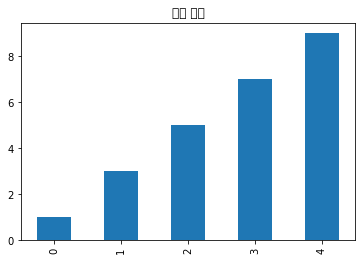

In [22]:
pd.Series([1,3,5,7,9]).plot.bar(title = '한글 제목')
plt.show()
# 한글 폰트 에러 발생

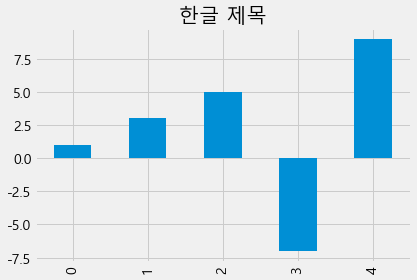

In [51]:
# matplotlib.pyplot을 통해 한글폰트를 설정
# plt.style.use 로 'fivethirtyeight' 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic') # window
plt.rc('axes', unicode_minus = False) # minus 표시
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

pd.Series([1,3,5,-7,9]).plot.bar(title = '한글 제목')
plt.show()

- 시각화 선명하게 설정하기

In [27]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해보인다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') # retina display

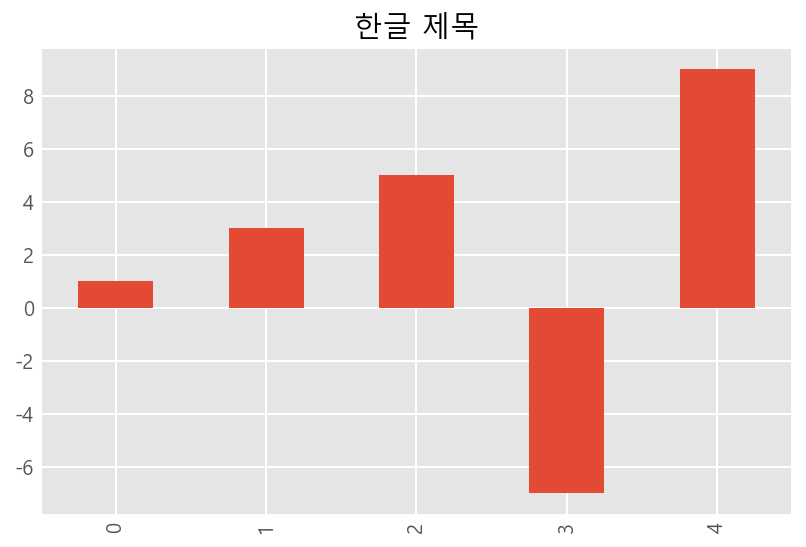

In [29]:
# matplotlib.pyplot을 통해 한글폰트를 설정
# plt.style.use 로 'fivethirtyeight' 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic') # window
plt.rc('axes', unicode_minus = False) # minus 표시
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

pd.Series([1,3,5,-7,9]).plot.bar(title = '한글 제목')
plt.show()

## 5. 확진일

In [30]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [31]:
df['확진일'].head()

0    9.28.
1    9.28.
2    9.28.
3    9.28.
4    9.28.
Name: 확진일, dtype: object

In [11]:
# 확진일의 빈도수를 본다. 어느 날짜에 가장 많이 확진이 되었는지 본다.
df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.30.      1
4.24.      1
4.20.      1
4.15.      1
1.24.      1
Name: 확진일, Length: 221, dtype: int64

In [33]:
# '확진일' 컬럼의 데이터가 날짜 형태가 아니라 문자형태이다.
df['확진일'].head(1)

0    9.28.
Name: 확진일, dtype: object

In [34]:
"2020-09-28"

'2020-09-28'

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환
# 판다스의 to_datetime을 사용해서 날짜 타입으로 변경할 수 있다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 '-' 문자로 날짜를 연결해준다.
df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))
df['확진일자'].head()

<ipython-input-12-3405259479cd>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))


0   2020-09-28
1   2020-09-28
2   2020-09-28
3   2020-09-28
4   2020-09-28
Name: 확진일자, dtype: datetime64[ns]

In [13]:
df[['확진일','확진일자']].head()

,확진일,확진일자
0,9.28.,2020-09-28
1,9.28.,2020-09-28
2,9.28.,2020-09-28
3,9.28.,2020-09-28
4,9.28.,2020-09-28


In [14]:
# 월만 추출
df['월'] = df['확진일자'].dt.month
df['월'].head()

0    9
1    9
2    9
3    9
4    9
Name: 월, dtype: int64

In [15]:
df[['확진일','확진일자','월']].tail()

,확진일,확진일자,월
5237,1.31.,2020-01-31,1
5238,1.30.,2020-01-30,1
5239,1.30.,2020-01-30,1
5240,1.30.,2020-01-30,1
5241,1.24.,2020-01-24,1


In [16]:
df[['확진일','확진일자','월']].head()

,확진일,확진일자,월
0,9.28.,2020-09-28,9
1,9.28.,2020-09-28,9
2,9.28.,2020-09-28,9
3,9.28.,2020-09-28,9
4,9.28.,2020-09-28,9


In [17]:
# 해당 연도의 몇번째 '주'인지 추출
df['주'] = df['확진일자'].dt.week
df['주'].head()

<ipython-input-17-b18d3d5b4e9a>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['주'] = df['확진일자'].dt.week


0    40
1    40
2    40
3    40
4    40
Name: 주, dtype: int64

In [18]:
df[['확진일','확진일자','월','주']].head()

,확진일,확진일자,월,주
0,9.28.,2020-09-28,9,40
1,9.28.,2020-09-28,9,40
2,9.28.,2020-09-28,9,40
3,9.28.,2020-09-28,9,40
4,9.28.,2020-09-28,9,40


선그래프 그리기

In [43]:
df['확진일자']

0      2020-09-28
1      2020-09-28
2      2020-09-28
3      2020-09-28
4      2020-09-28
          ...    
5237   2020-01-31
5238   2020-01-30
5239   2020-01-30
5240   2020-01-30
5241   2020-01-24
Name: 확진일자, Length: 5242, dtype: datetime64[ns]

In [44]:
df['확진일자'].value_counts() # 확진일자의 빈도 수 확인

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
             ... 
2020-04-24      1
2020-04-20      1
2020-04-19      1
2020-04-15      1
2020-01-24      1
Name: 확진일자, Length: 220, dtype: int64

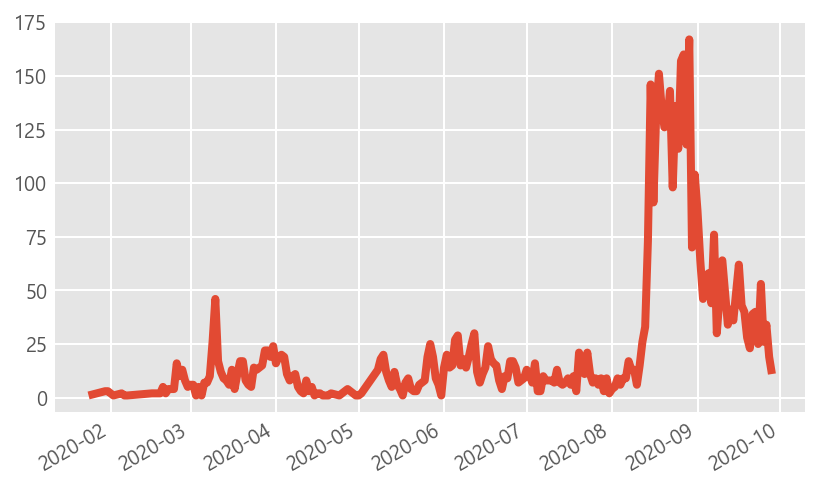

In [45]:
df['확진일자'].value_counts().plot()
plt.show()

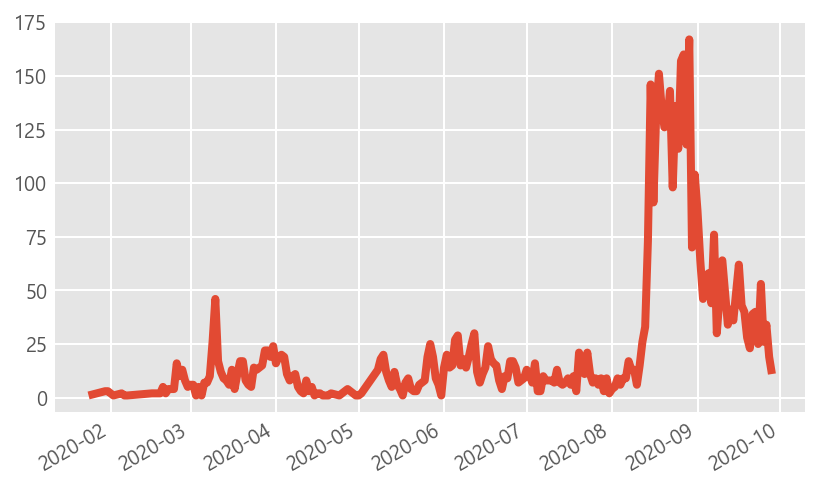

In [47]:
df['확진일자'].value_counts().sort_index().plot()
plt.show()

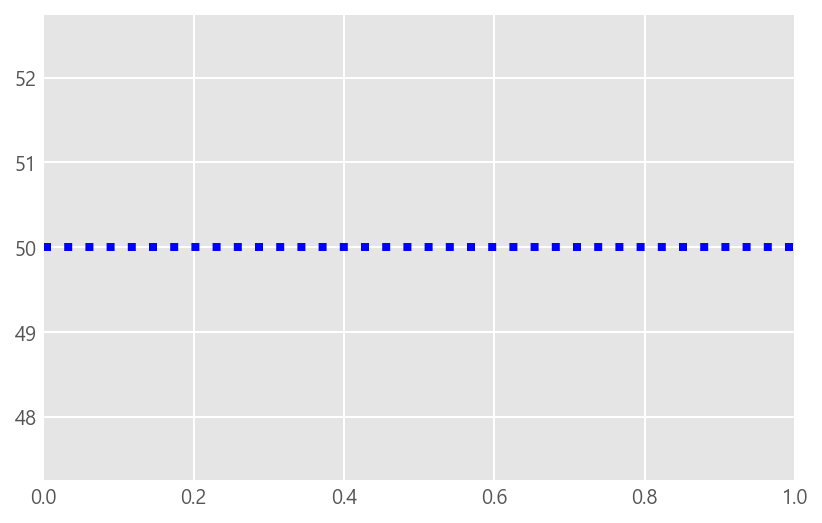

In [50]:
plt.axhline(50, color = 'blue', linestyle = ':')
plt.show()
# axhline : 수평선으로 라인 축 그리기
# axe : 축, horizon : 수평선

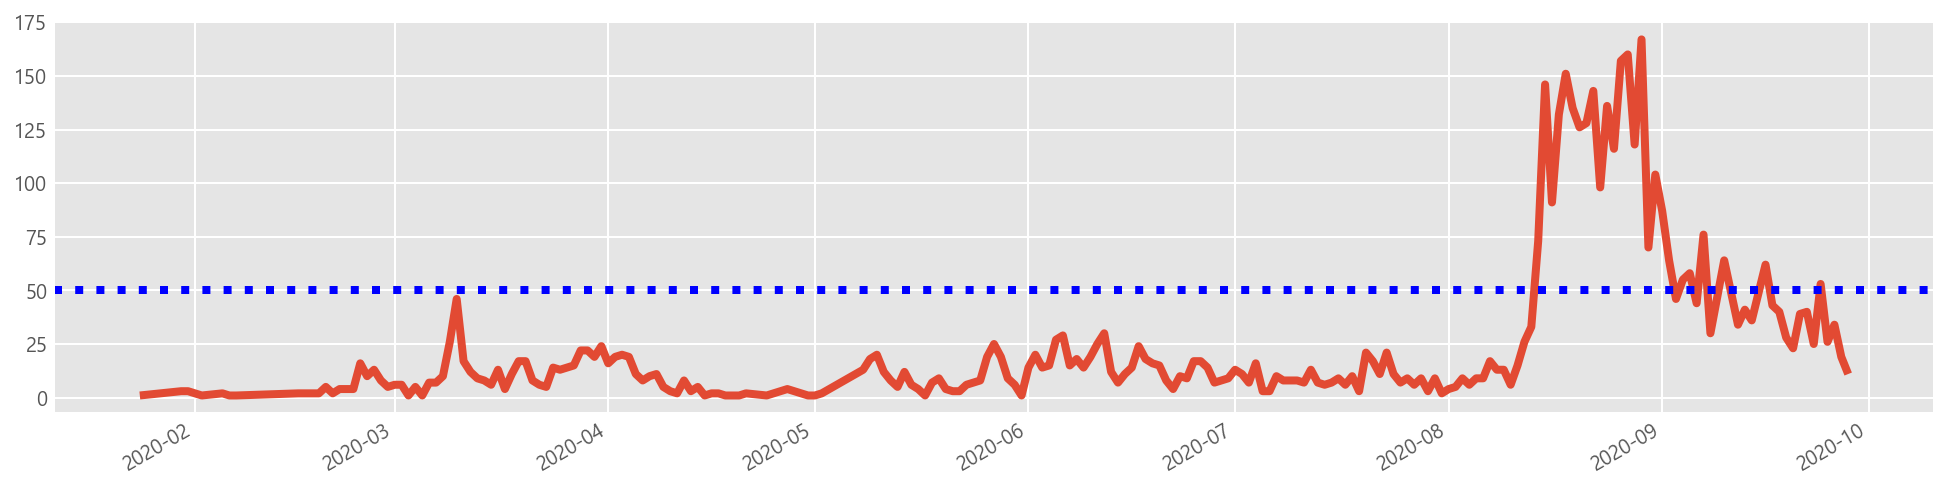

In [54]:
# 확진일자로 선그래프를 그린다.
df['확진일자'].value_counts().sort_index().plot(figsize = (15,4))
plt.axhline(50, color = 'blue', linestyle = ':')
plt.show()

선그래프에 값 표시하기

In [55]:
# 일자별 확진자수를 선그래프로 그린다.
df['확진일자'].head()

0   2020-09-28
1   2020-09-28
2   2020-09-28
3   2020-09-28
4   2020-09-28
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# 위에서 문자 5개 가지고 오기
df['확진일자'].astype(str).map(lambda x : x[-5:]).head()

0    09-28
1    09-28
2    09-28
3    09-28
4    09-28
Name: 확진일자, dtype: object

In [20]:
# 연도는 모두 2020년이기 때문에 월일만 표기되도록
# 슬라이싱을 사용해 '월일' 컬럼을 만든다.
df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])
day_count = df['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

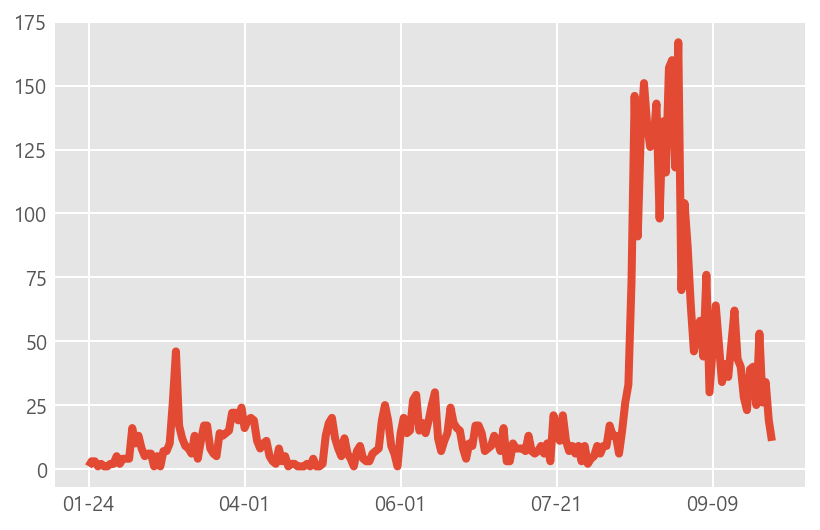

In [59]:
day_count.plot()
plt.show()

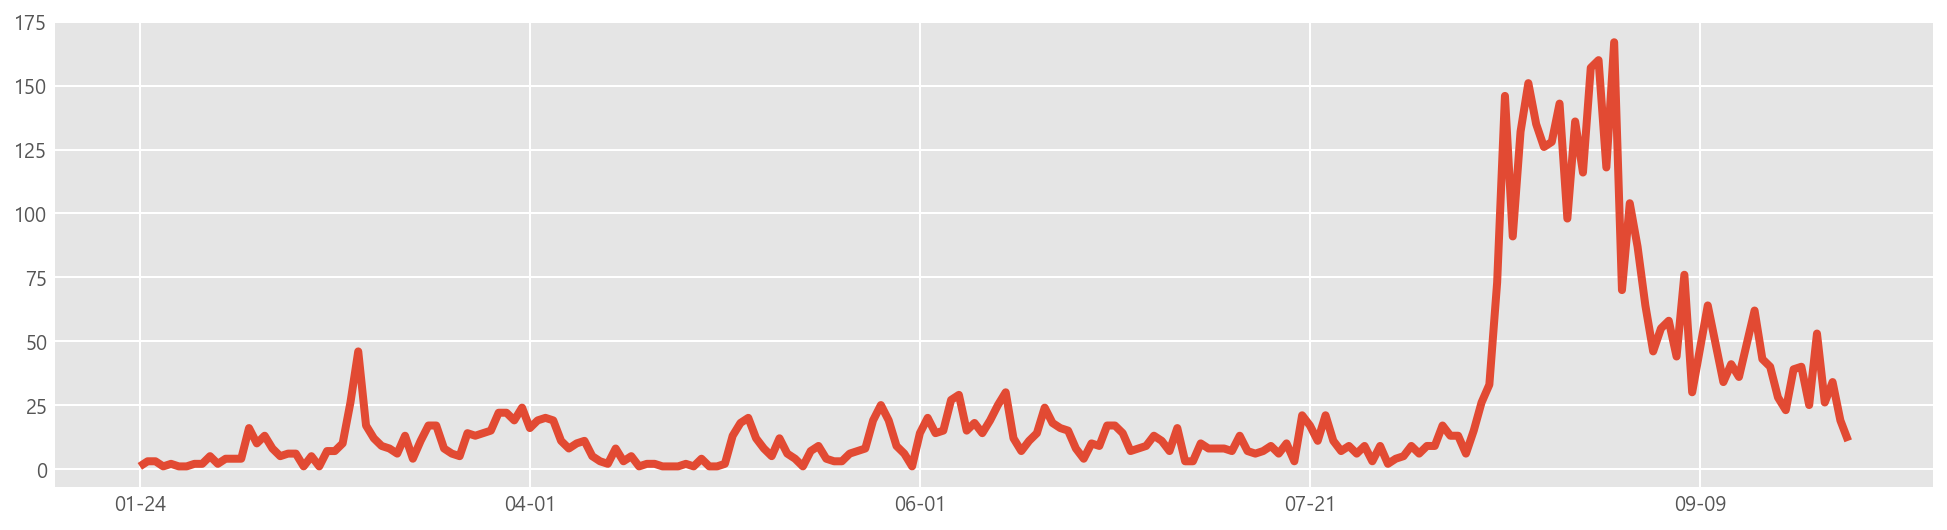

In [60]:
day_count.plot(figsize = (15,4))
plt.show()

In [61]:
day_count.head()

01-24    1
01-30    3
01-31    3
02-02    1
02-05    2
Name: 월일, dtype: int64

In [ ]:
# day_count.loc[2]
# Type error 발생, loc는 정확하게 index 값이 매칭이 되어야 함

In [63]:
day_count.iloc[0]

1

In [64]:
day_count.iloc[1]

3

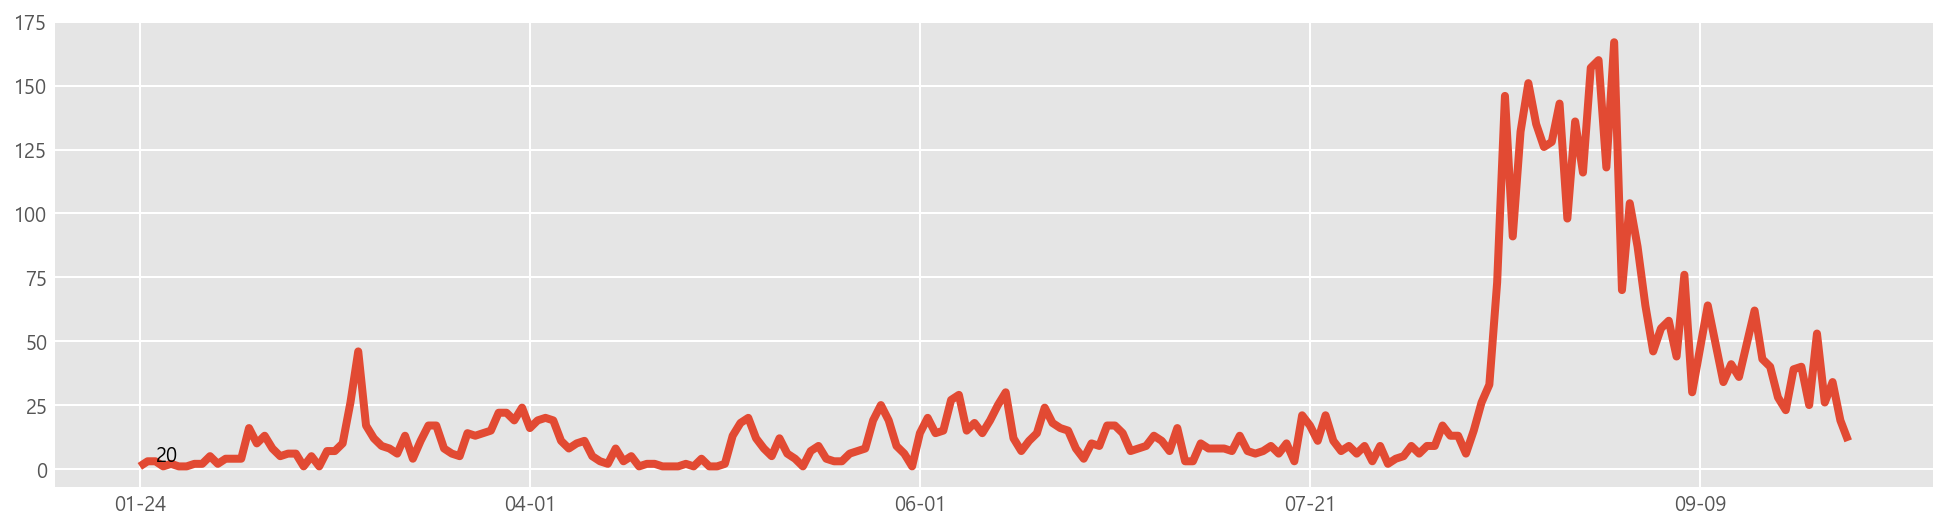

In [65]:
g = day_count.plot(figsize = (15,4))
g.text(x=2, y=3, s=20)
plt.show()
# Add the text *s* to the axes at location *x*, *y* in data coordinates

In [66]:
len(day_count)

220

In [67]:
for i in range(len(day_count)):
    print(day_count.iloc[i])

1
3
3
1
2
1
1
2
2
5
2
4
4
4
16
10
13
8
5
6
6
1
5
1
7
7
10
26
46
17
12
9
8
6
13
4
11
17
17
8
6
5
14
13
14
15
22
22
19
24
16
19
20
19
11
8
10
11
5
3
2
8
3
5
1
2
2
1
1
1
2
1
4
1
1
2
13
18
20
12
8
5
12
6
4
1
7
9
4
3
3
6
7
8
19
25
19
9
6
1
14
20
14
15
27
29
15
18
14
19
25
30
12
7
11
14
24
18
16
15
8
4
10
9
17
17
14
7
8
9
13
11
7
16
3
3
10
8
8
8
7
13
7
6
7
9
6
10
3
21
17
11
21
11
7
9
6
9
3
9
2
4
5
9
6
9
9
17
13
13
6
15
26
33
73
146
91
132
151
135
126
128
143
98
136
116
157
160
118
167
70
104
87
64
46
55
58
44
76
30
47
64
49
34
41
36
49
62
43
40
28
23
39
40
25
53
26
34
19
11


In [68]:
for i in range(len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 9
130 13
131 11
132 7
133 16
134 3
135 3
136 10
137 8
138 8
139 8
140 7
141 13
142 7
143 6
144 7
145 9
146 6
147 10
148 3
149 21
150 17
151 11
152 21
153 11
154 7
155 9
156 6
157 9
158 3
159 9
160 2
161 4
162 5
163 9
164 6
165 9
166 9
167 17
168 13
169 13
170 6
171 15
172 2

In [69]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 50:
        print(i, case_count)
        
# 환자발생이 50명 이상(사회적 거리두기 2단계)인 것만 추출

174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
195 55
196 58
198 76
201 64
207 62
215 53


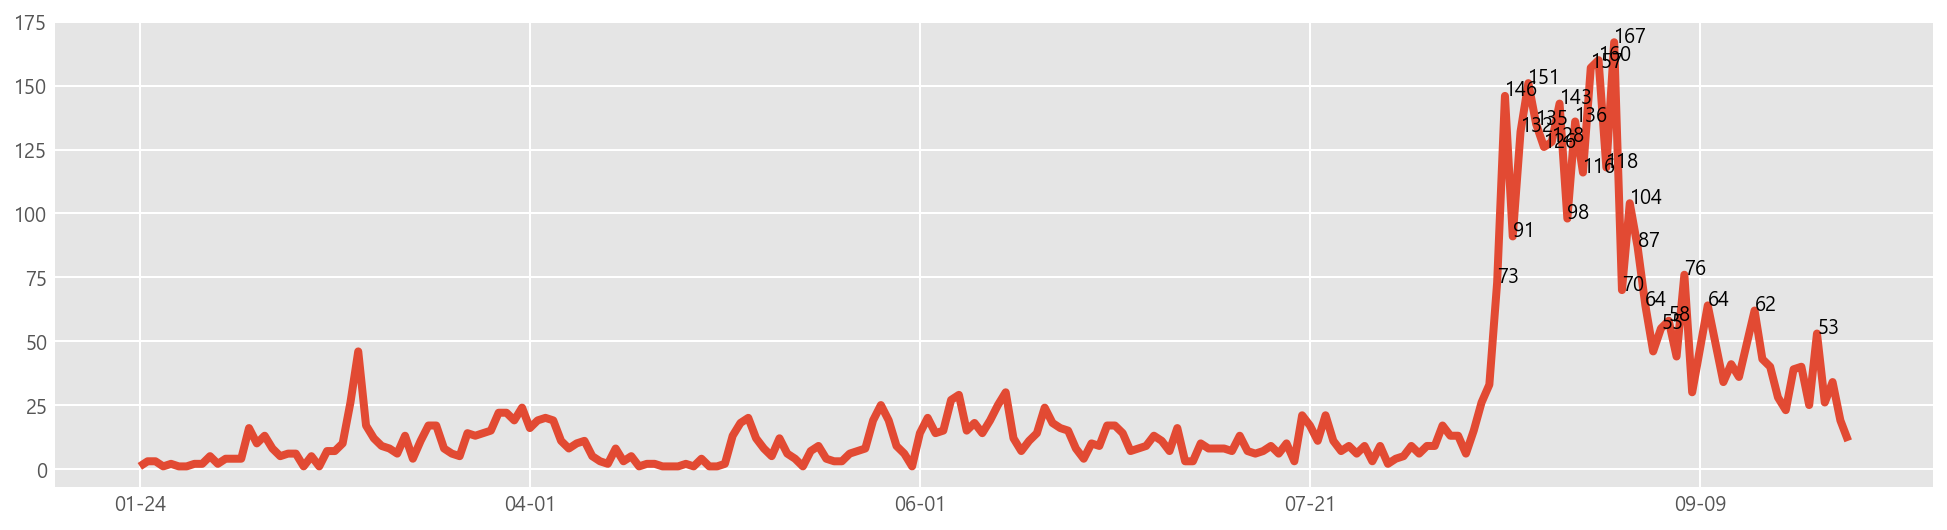

In [70]:
g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 50:
        g.text(x=i, y=case_count, s=case_count)

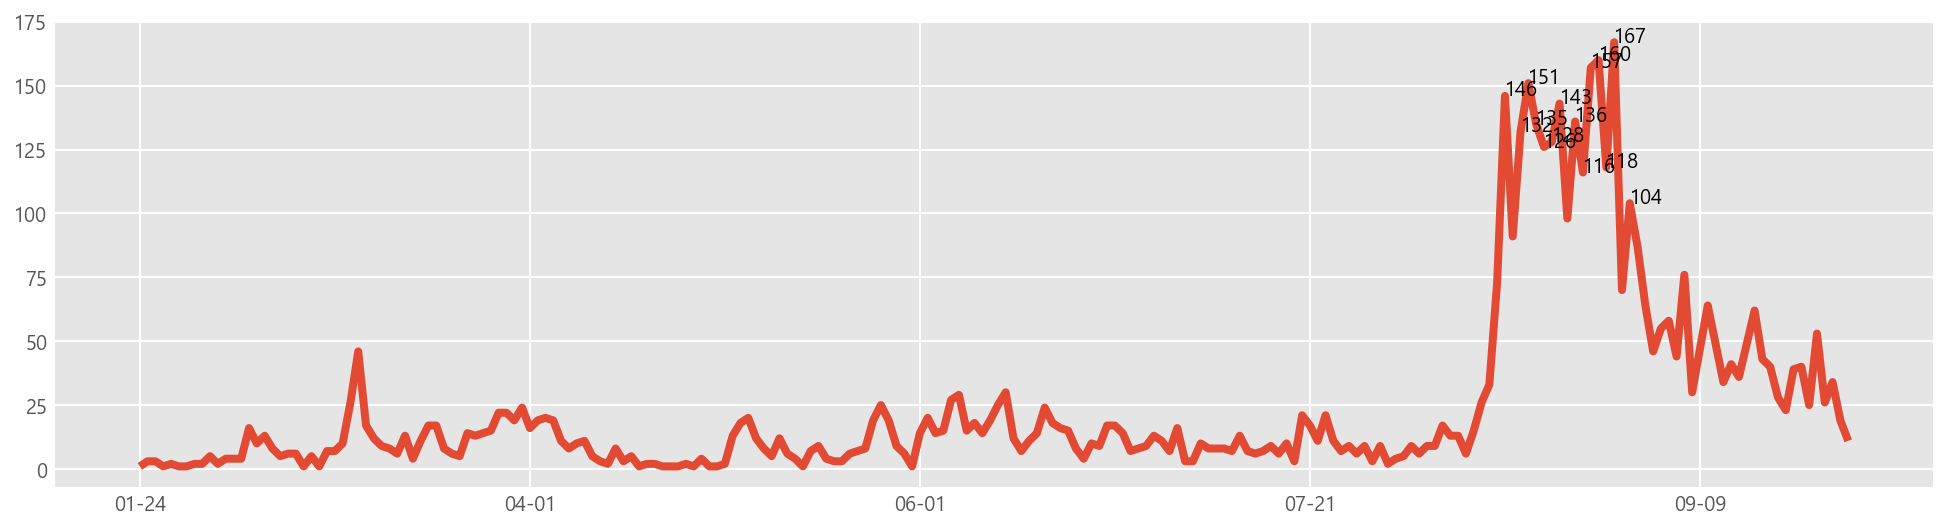

In [71]:
g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 100:
        g.text(x=i, y=case_count, s=case_count)
        
# 환자발생이 100 이상(사회적 거리두기 3단계)인 것만 추출(2.5~3단계)

확진자가 가장 많이 나온 날

In [72]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해본다.
day_count.describe()

count    220.000000
mean      23.827273
std       34.439374
min        1.000000
25%        6.000000
50%       11.000000
75%       22.250000
max      167.000000
Name: 월일, dtype: float64

In [21]:
# 확진자가 가장 많았던 날
day_count == day_count.max()

01-24    False
01-30    False
01-31    False
02-02    False
02-05    False
         ...  
09-24    False
09-25    False
09-26    False
09-27    False
09-28    False
Name: 월일, Length: 220, dtype: bool

In [22]:
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [23]:
# 확진자가 가장 많았던 날의 발생이력
df[df['월일'] == '08-29']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1329,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1364,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
1391,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
1392,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
1393,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
...,...,...,...,...,...,...,...,...,...,...,...
1579,3663,19451,8.29.,강남구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1580,3662,19462,8.29.,동대문구,-,동대문구 sk탁구클럽,퇴원,2020-08-29,8,35,08-29
1581,3661,19416,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1582,3660,19434,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29


막대그래프 그리기

<AxesSubplot:>

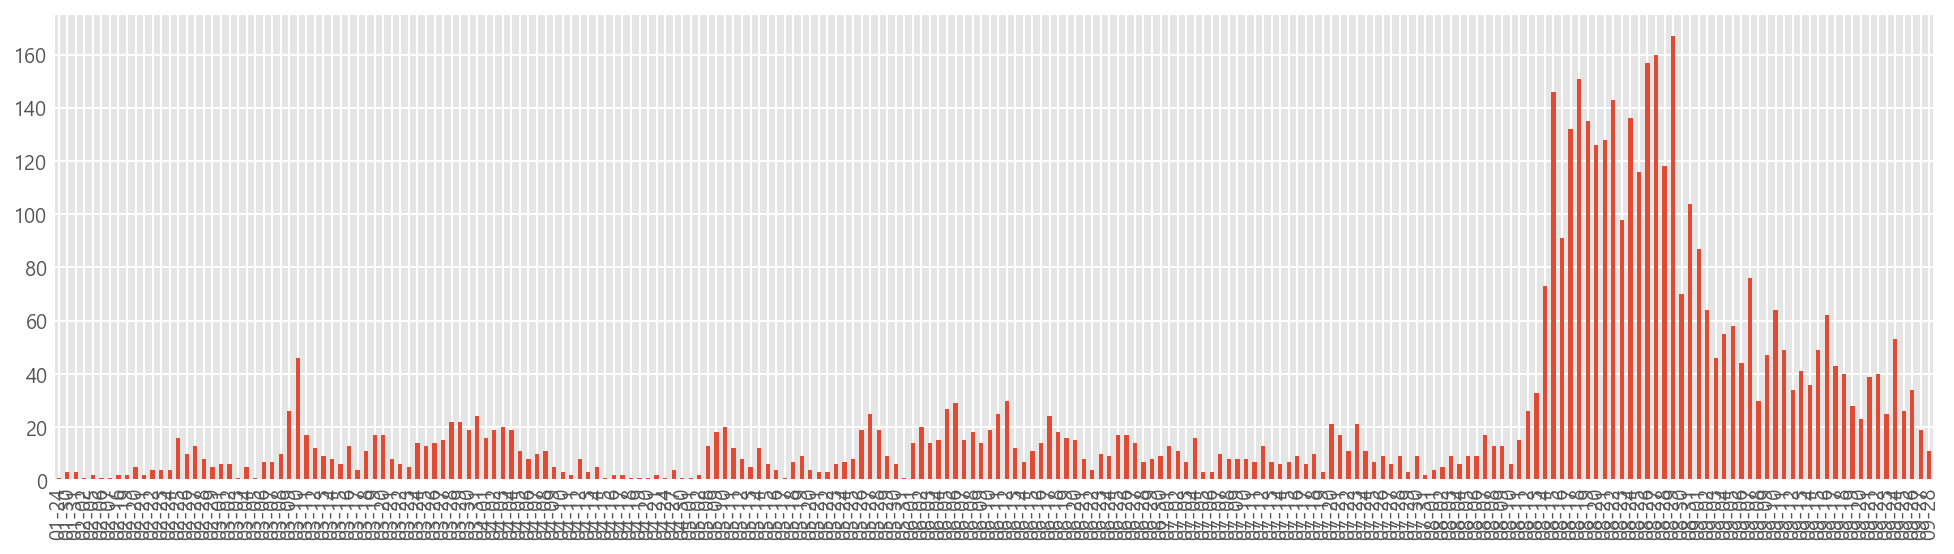

In [76]:
# 선그래프로 그렸던 그래프를 막대그래프로 그린다.
day_count.plot.bar(figsize = (15,4))
plt.show()

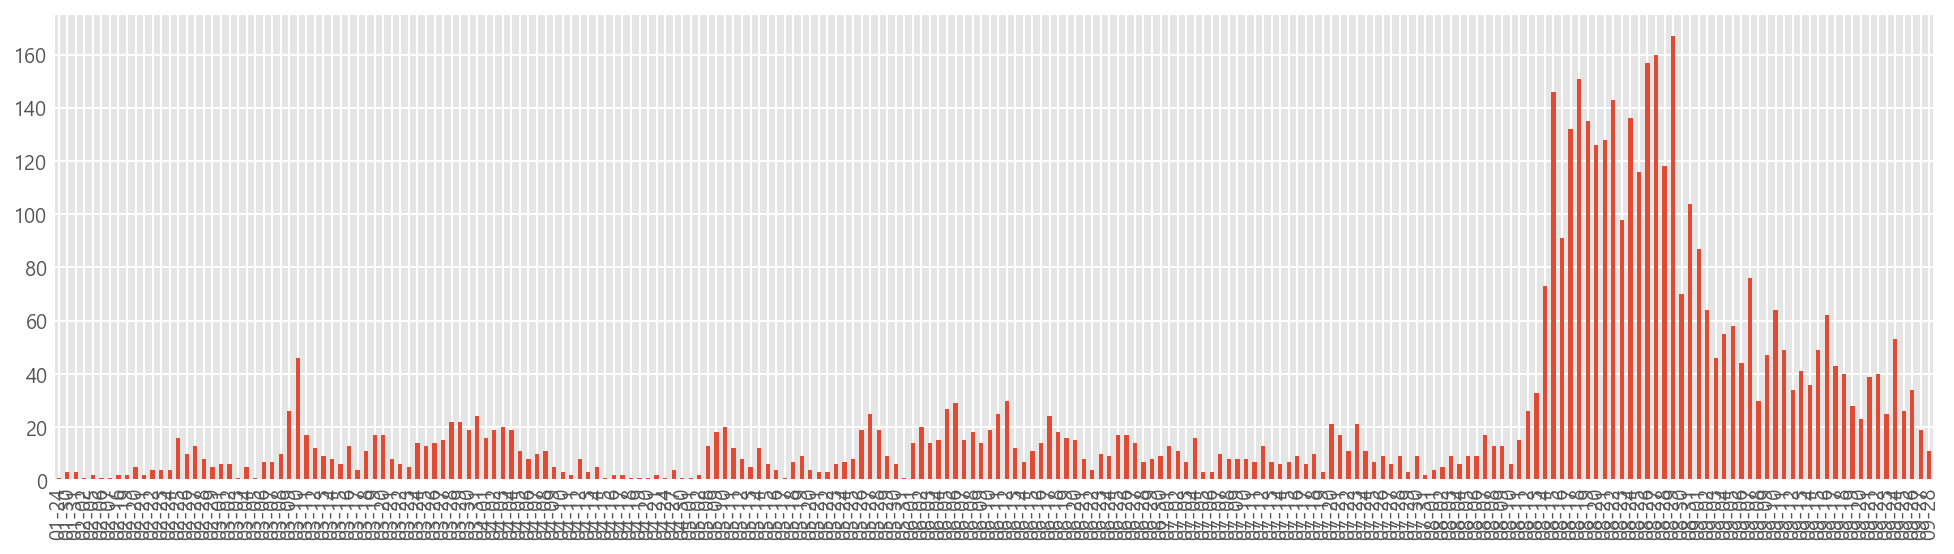

In [77]:
day_count.plot.bar(figsize = (15,4), rot = 90)
plt.show()

최근 데이터만 슬라이싱으로 나눠 그리기

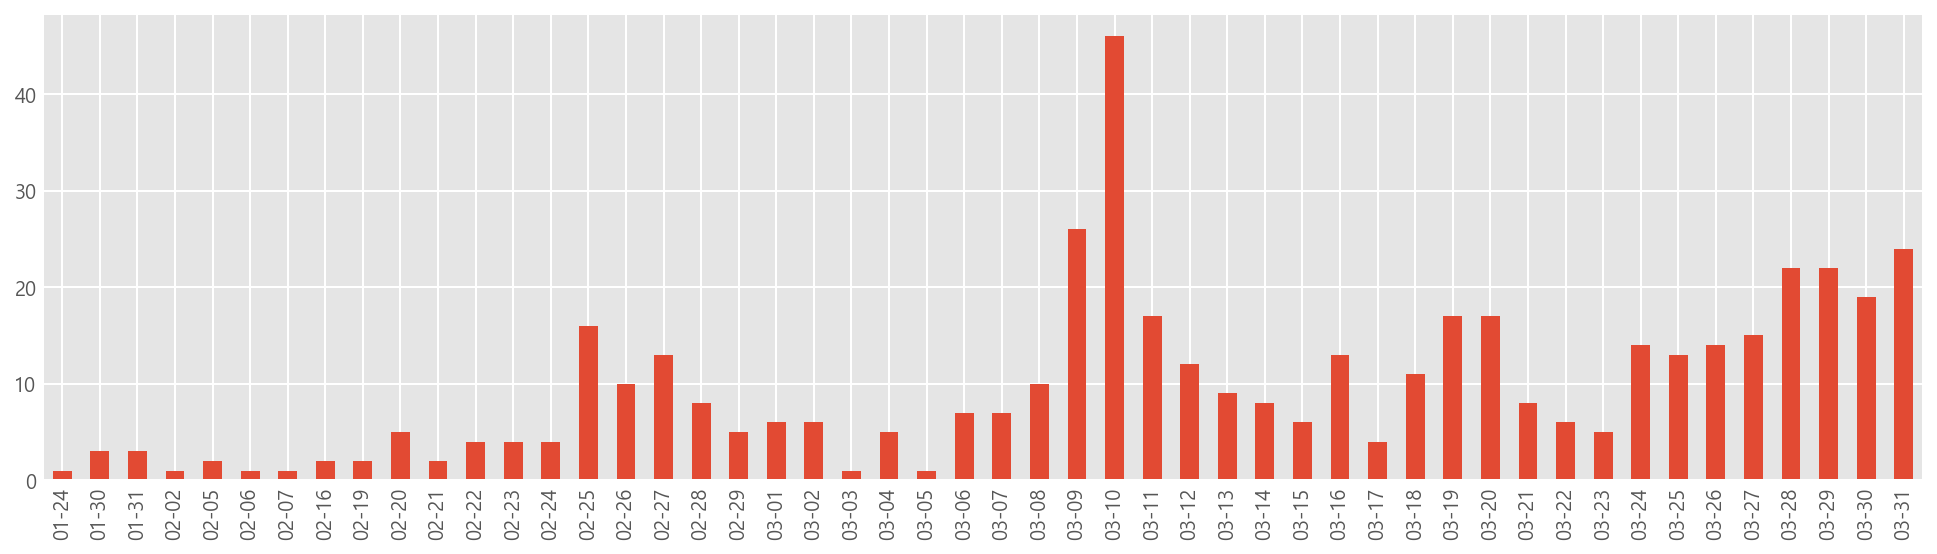

In [79]:
# 슬라이싱을 통해 최근데이터(최근 50일)만 그린다.
day_count[:50].plot.bar(figsize = (15,4))
plt.show()

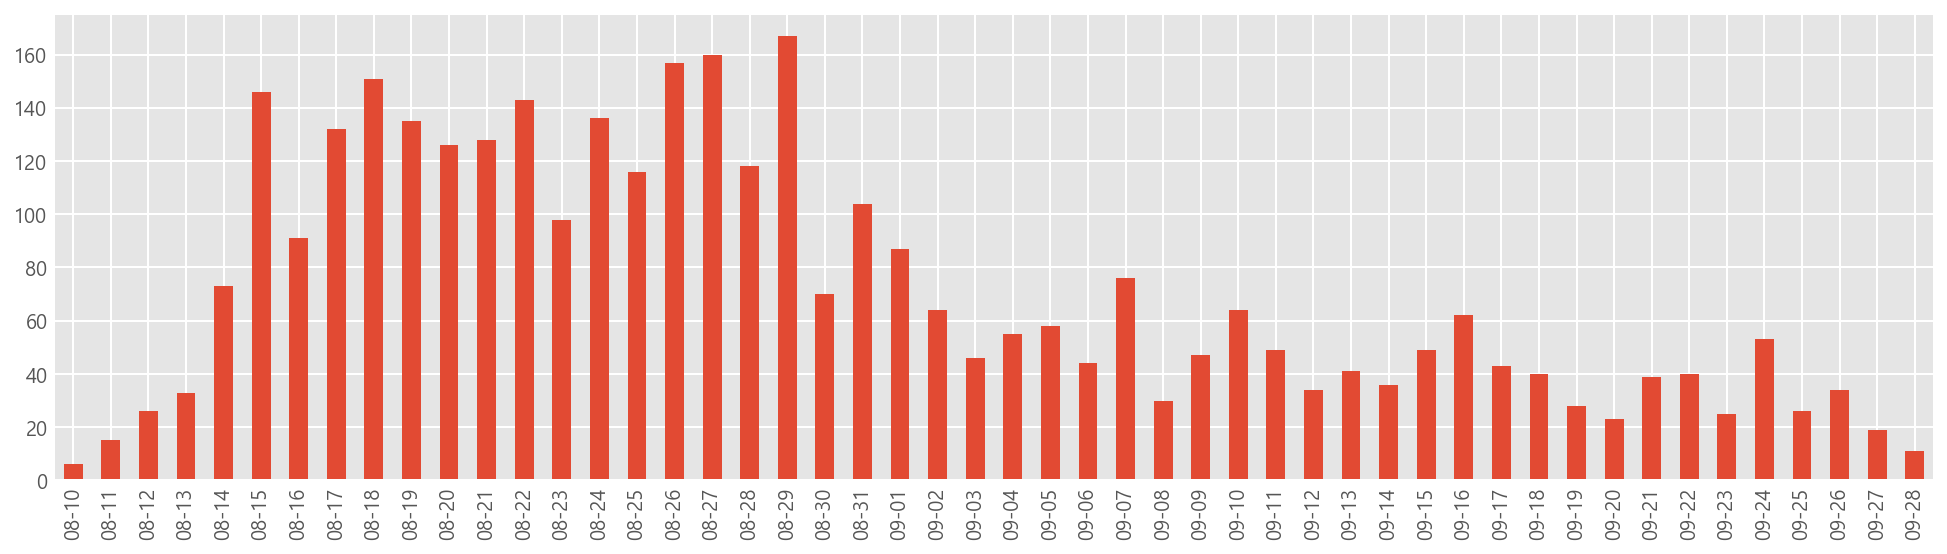

In [80]:
day_count[-50:].plot.bar(figsize = (15,4))
plt.show()

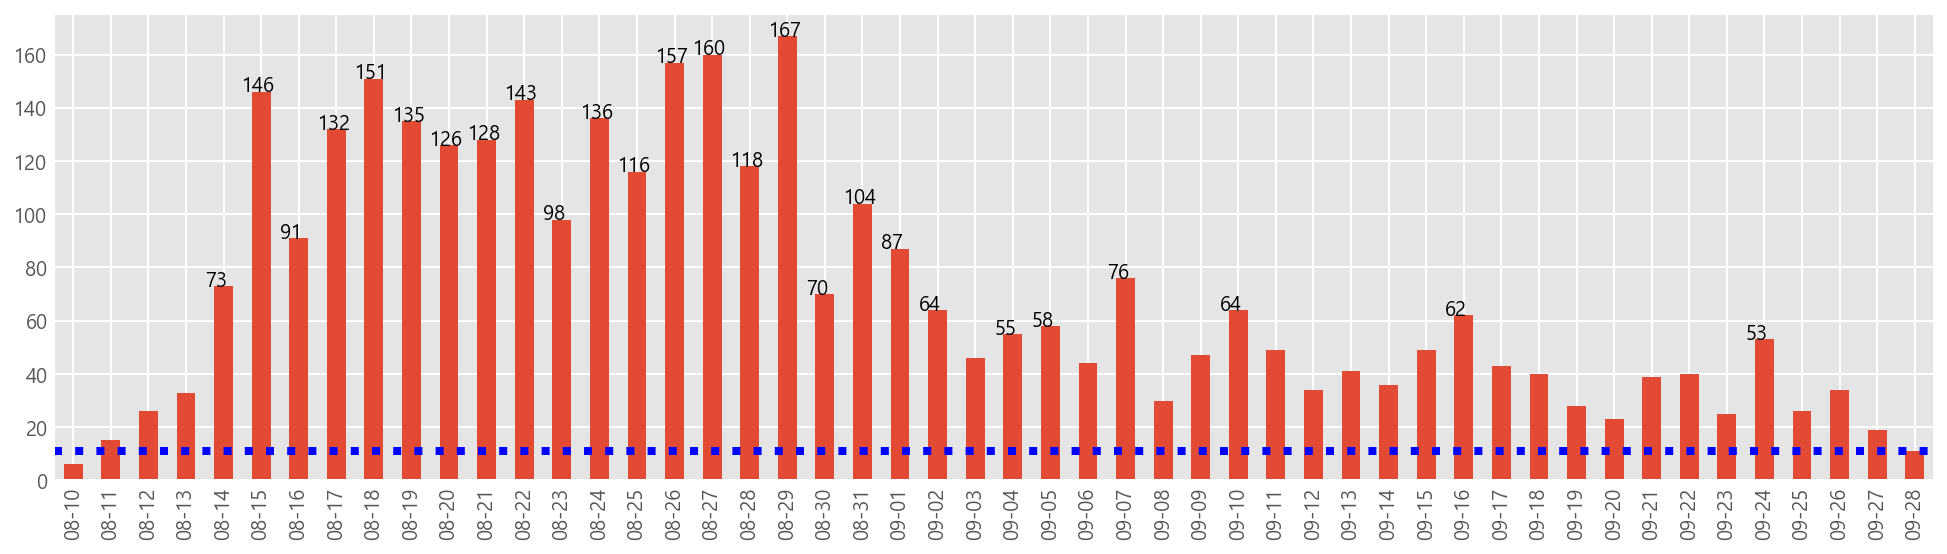

In [83]:
g = day_count[-50:].plot.bar(figsize = (15,4))
g.axhline(day_count.median(), linestyle = ':', color = 'blue')

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 50:
        g.text(x=i-0.5, y=case_count, s=case_count)
        # x = i-0.5 : text를 가운데로 옮기기 위해 위치 조정

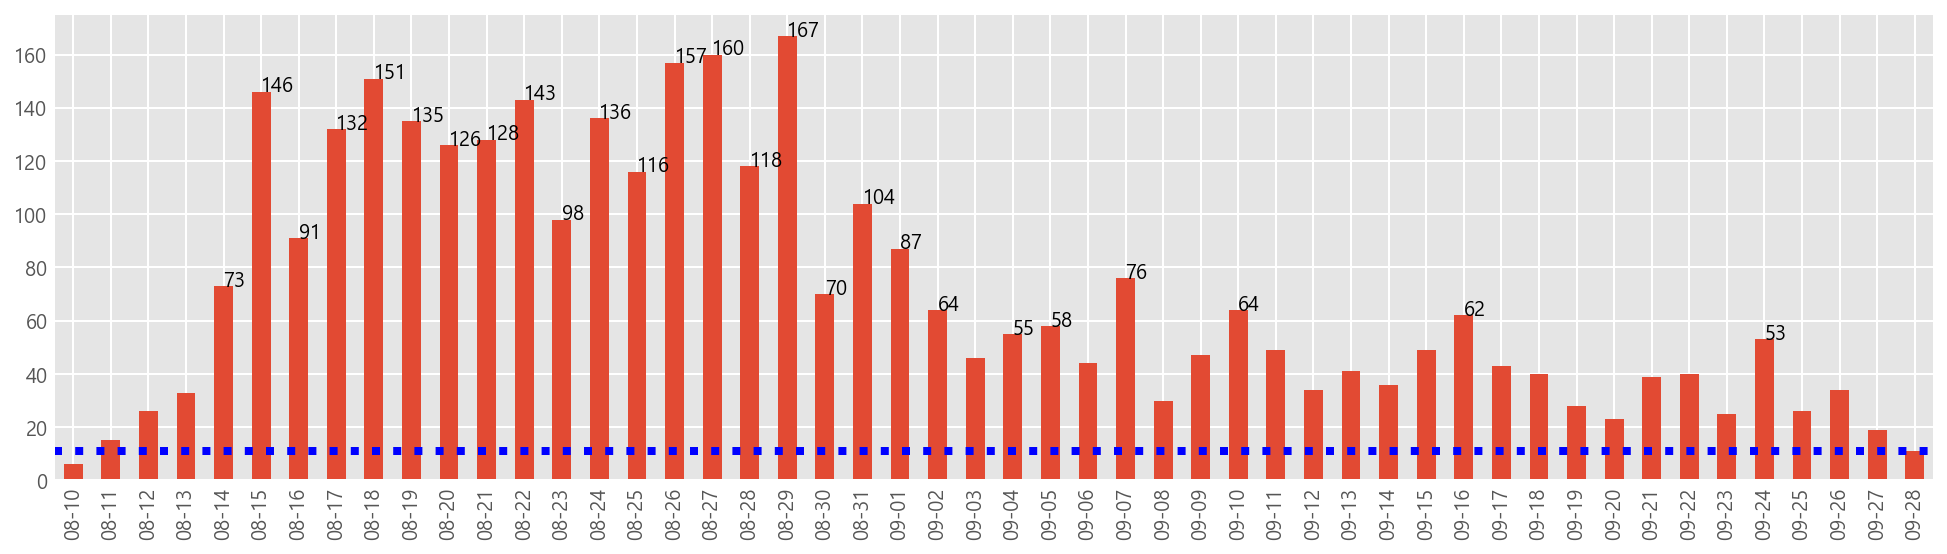

In [84]:
g = day_count[-50:].plot.bar(figsize = (15,4))
g.axhline(day_count.median(), linestyle = ':', color = 'blue')

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 50:
        g.text(x=i, y=case_count, s=case_count)
        # x = i-0.5 : text를 가운데로 옮기기 위해 위치 조정

In [85]:
day_count.mean()

23.827272727272728

In [86]:
day_count.median()

11.0

일일 확진자수 그리기

In [87]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화
df['월']

0       9
1       9
2       9
3       9
4       9
       ..
5237    1
5238    1
5239    1
5240    1
5241    1
Name: 월, Length: 5242, dtype: int64

In [88]:
df['월'].value_counts()

8    2416
9    1223
6     460
3     391
7     281
5     228
4     156
2      80
1       7
Name: 월, dtype: int64

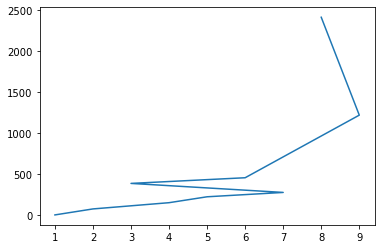

In [24]:
month_case = df['월'].value_counts()
month_case.plot()
plt.show()

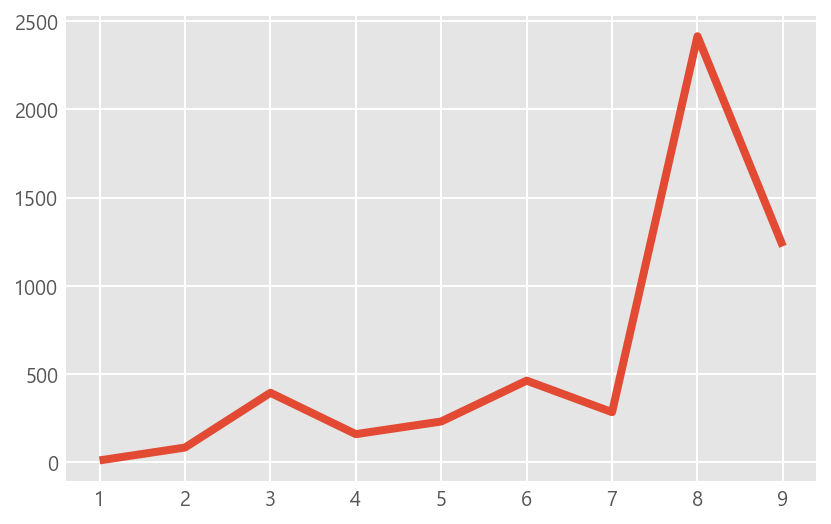

In [91]:
month_case = df['월'].value_counts().sort_index() # 월별로 빈도수 표현
month_case.plot()
plt.show()

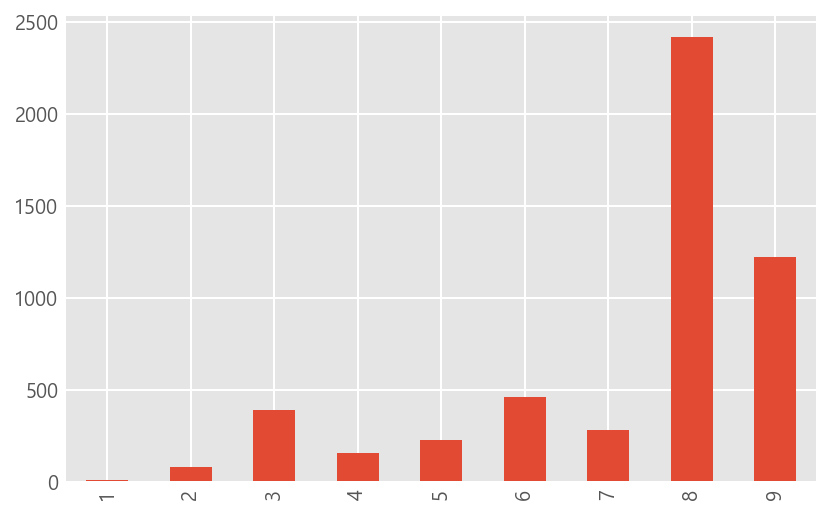

In [92]:
month_case = df['월'].value_counts().sort_index() # 월별로 빈도수 표현
month_case.plot.bar()
plt.show()

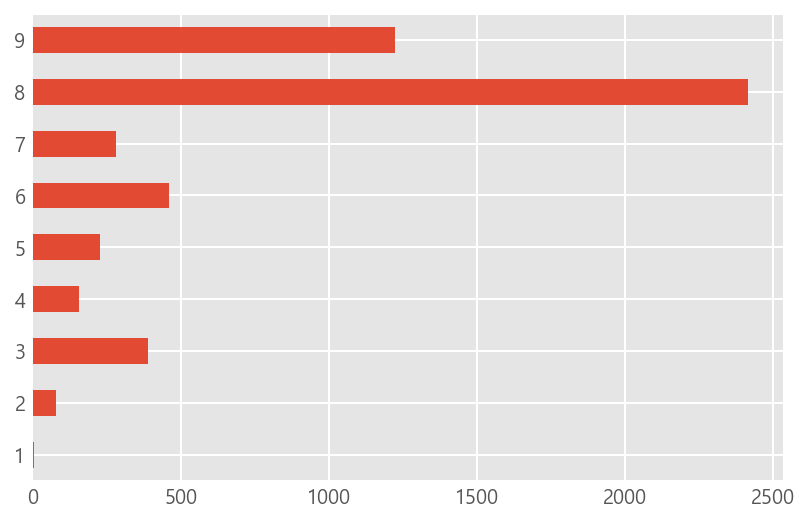

In [95]:
month_case = df['월'].value_counts().sort_index() # 월별로 빈도수 표현
month_case.plot.barh()
plt.show()

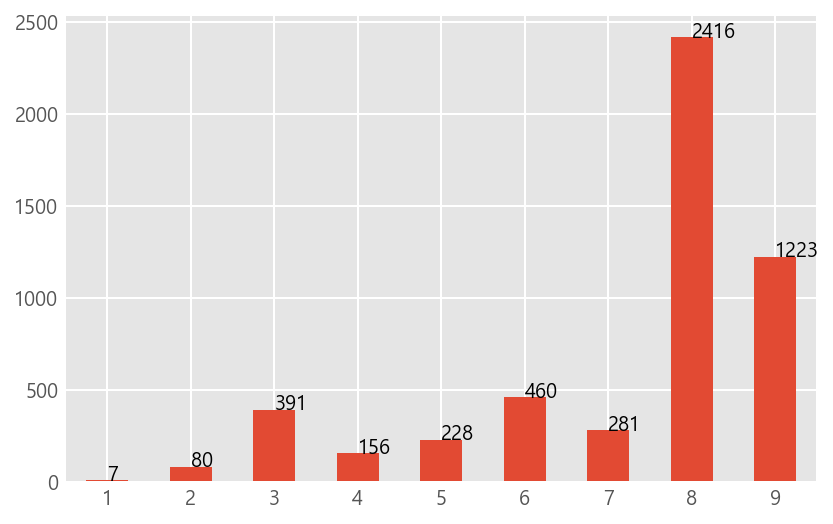

In [96]:
month_case = df['월'].value_counts().sort_index() 
g = month_case.plot.bar(rot = 0)

for i in range(len(month_case)):
    g.text(x=i, y=month_case.iloc[i], s = month_case.iloc[i])
plt.show()

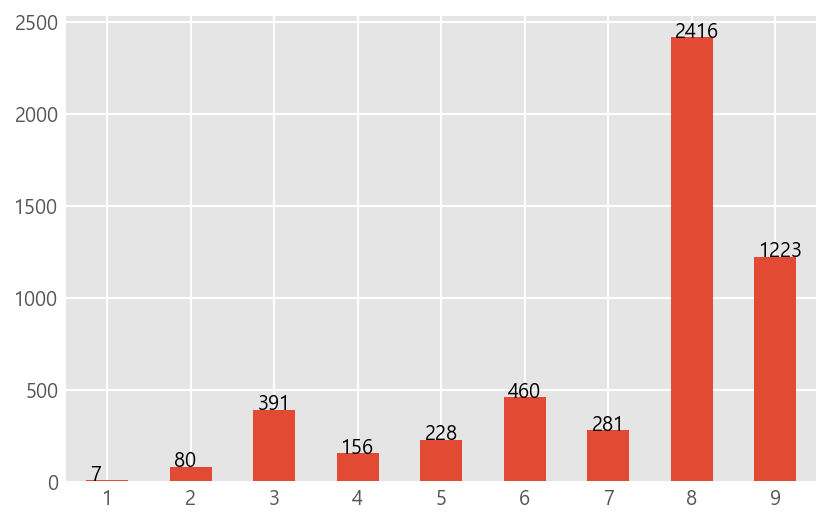

In [97]:
month_case = df['월'].value_counts().sort_index() 
g = month_case.plot.bar(rot = 0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i], s = month_case.iloc[i])
plt.show()

주 단위 확진자수 그리기

In [98]:
df['주'].value_counts()

35    924
34    913
36    458
33    390
37    341
38    281
39    236
23    134
14    128
24    125
11    124
25    106
13    105
30     97
22     87
26     78
12     76
32     76
27     67
9      62
28     57
19     51
20     48
29     48
15     47
21     39
31     38
10     37
8      17
16     15
40     11
18      8
5       7
17      4
6       4
7       2
4       1
Name: 주, dtype: int64

In [25]:
weekly_case = df['주'].value_counts().sort_index()
weekly_case

4       1
5       7
6       4
7       2
8      17
9      62
10     37
11    124
12     76
13    105
14    128
15     47
16     15
17      4
18      8
19     51
20     48
21     39
22     87
23    134
24    125
25    106
26     78
27     67
28     57
29     48
30     97
31     38
32     76
33    390
34    913
35    924
36    458
37    341
38    281
39    236
40     11
Name: 주, dtype: int64

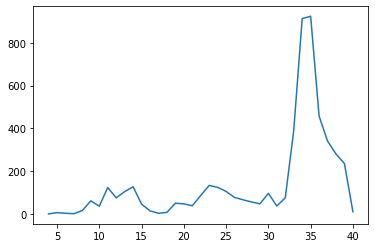

In [26]:
weekly_case = df['주'].value_counts().sort_index()
weekly_case.plot()
plt.show()

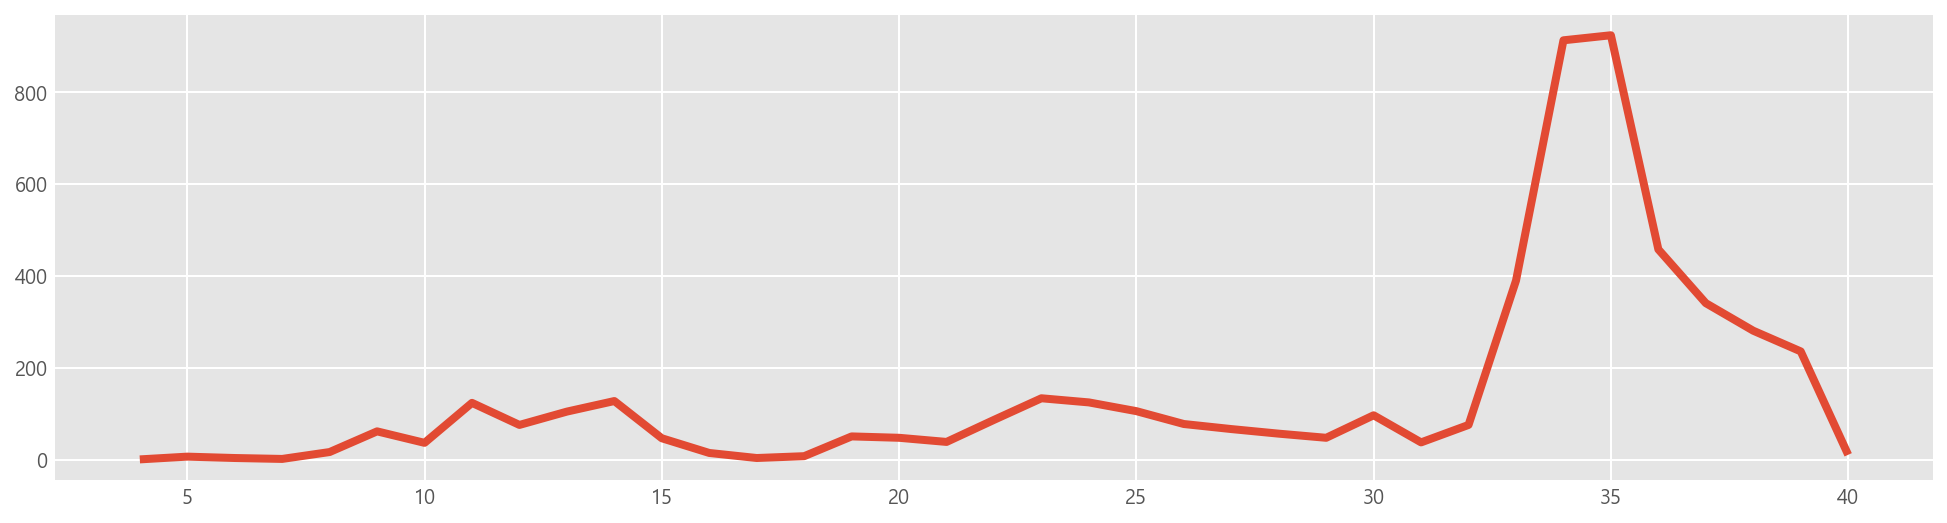

In [101]:
weekly_case.plot(figsize = (15,4))
plt.show()

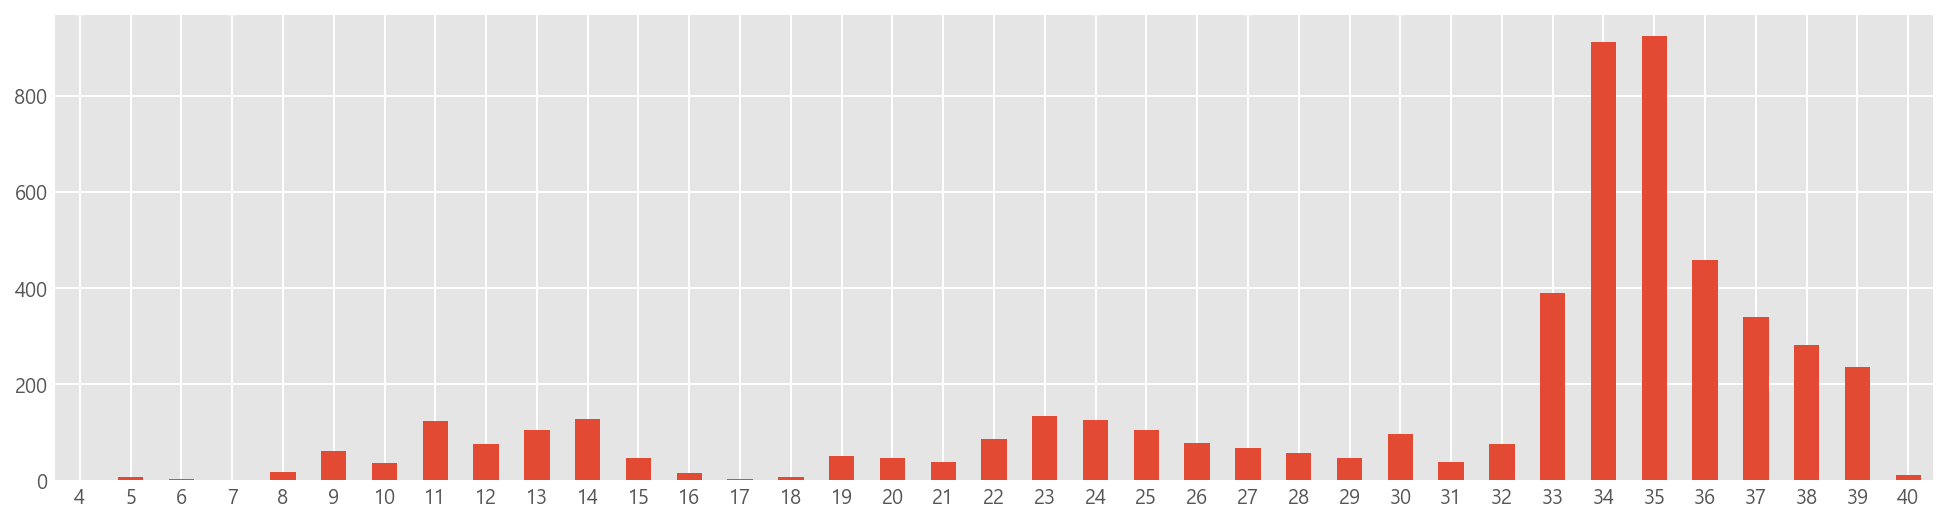

In [102]:
weekly_case.plot.bar(figsize = (15,4), rot = 0)
plt.show()

월-주 함께 그리기

In [103]:
df[['월','주']]

,월,주
0,9,40
1,9,40
2,9,40
3,9,40
4,9,40
...,...,...
5237,1,5
5238,1,5
5239,1,5
5240,1,5


In [104]:
# df[['월','주']].value_counts()
# AttributeError : 'DataFrame' object has no attribute 'value_counts'
# value_counts는 series만 나옴. 따라서 group by로 두개를 같이 나타내야 함

월  주 
8  35    924
   34    913
   33    390
9  36    354
   37    341
   38    281
   39    236
6  23    134
   24    125
3  11    124
6  25    106
3  13    105
8  36    104
7  30     97
5  22     87
4  14     85
6  26     78
3  12     76
8  32     76
7  28     57
2  9      56
5  19     51
7  27     50
5  20     48
7  29     48
4  15     47
3  14     43
5  21     39
3  10     37
7  31     29
6  27     17
2  8      17
4  16     15
9  40     11
8  31      9
1  5       6
3  9       6
4  18      5
   17      4
2  6       4
5  18      3
2  7       2
   5       1
1  4       1
dtype: int64

In [27]:
df.groupby(['월','주'])

In [108]:
df.groupby(['월','주']).count()

연번   환자  확진일  거주지  여행력  접촉력  퇴원현황  확진일자   월일
월 주                                                
1 4     1    1    1    1    1    1     1     1    1
  5     6    6    6    6    6    6     6     6    6
2 5     1    1    1    1    1    1     1     1    1
  6     4    4    4    4    4    4     4     4    4
  7     2    2    2    2    2    2     2     2    2
  8    17   17   17   17   17   17    17    17   17
  9    56   56   56   56   56   56    56    56   56
3 9     6    6    6    6    6    6     6     6    6
  10   37   37   37   37   37   37    37    37   37
  11  124  124  124  124  124  124   124   124  124
  12   76   76   76   76   76   76    76    76   76
  13  105  105  105  105  105  105   105   105  105
  14   43   43   43   43   43   43    43    43   43
4 14   85   85   85   85   85   85    85    85   85
  15   47   47   47   47   47   47    47    47   47
  16   15   15   15   15   15   15    15    15   15
  17    4    4    4    4    4    4     4     4    4
  18    5    5    5    5    5    5     5     5    5
5 18    3    3    3    3    3    3     3     3    3
  19   51   51   51   51   51   51    51    51   51
  20   48   48   48   48   48   48    48    48   48
  21   39   39   39   39   39   39    39    39   39
  22   87   87   87   87   87   87    87    87   87
6 23  134  134  134  134  134  134   134   134  134
  24  125  125  125  125  125  125   125   125  125
  25  106  106  106  106  106  106   106   106  106
  26   78   78   78   78   78   78    78    78   78
  27   17   17   17   17   17   17    17    17   17
7 27   50   50   50   50   50   50    50    50   50
  28   57   57   57   57   57   57    57    57   57
  29   48   48   48   48   48   48    48    48   48
  30   97   97   97   97   97   97    96    97   97
  31   29   29   29   29   29   29    29    29   29
8 31    9    9    9    9    9    9     8     9    9
  32   76   76   76   76   76   76    76    76   76
  33  390  390  390  390  390  390   383   390  390
  34  913  913  913  913  913  913   864   913  913
  35  924  924  924  924  924  924   845   924  924
  36  104  104  104  104  104  104    98   104  104
9 36  354  354  354  354  354  354   295   354  354
  37  341  341  341  341  341  341   227   341  341
  38  281  281  281  281  281  281    56   281  281
  39  236  236  236  236  236  236     0   236  236
  40   11   11   11   11   11   11     0    11   11

In [28]:
# groupby 를 통해 '월', '주'로 그룹화 하여 빈도수를 계산
month_weekly_case = df.groupby(['월','주'])['확진일'].count()
month_weekly_case
# series 형태로 반환

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     57
   29     48
   30     97
   31     29
8  31      9
   32     76
   33    390
   34    913
   35    924
   36    104
9  36    354
   37    341
   38    281
   39    236
   40     11
Name: 확진일, dtype: int64

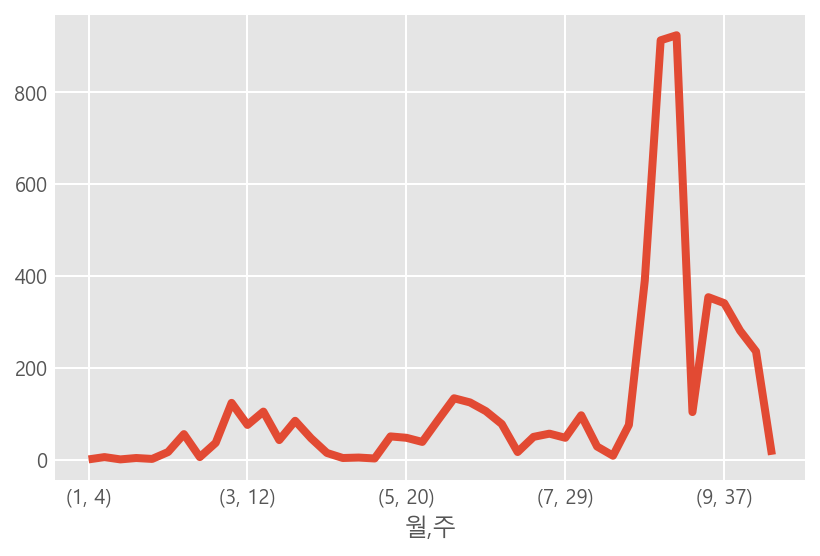

In [110]:
# 월-주를 함께 그래프에 표현하기
month_weekly_case.plot()
plt.show()
# multi-index 형태로 반환

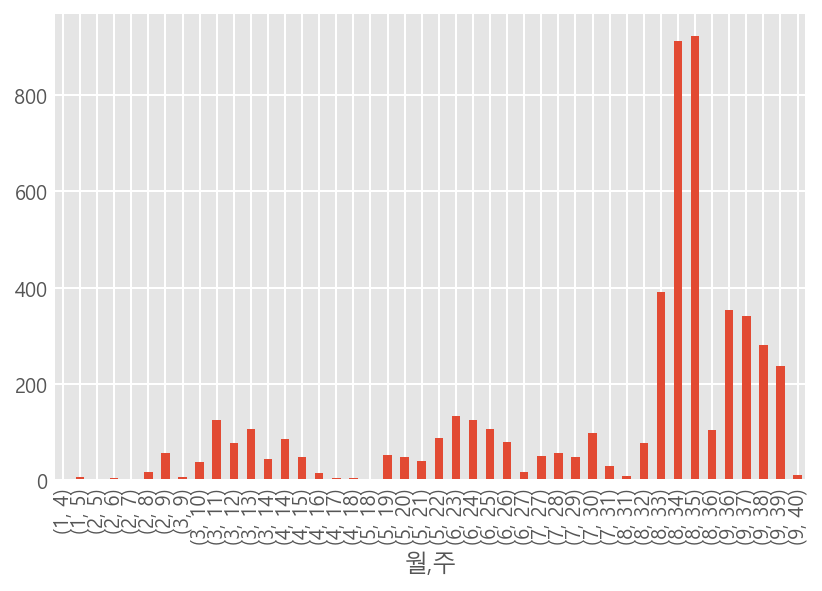

In [111]:
month_weekly_case.plot.bar()
plt.show()

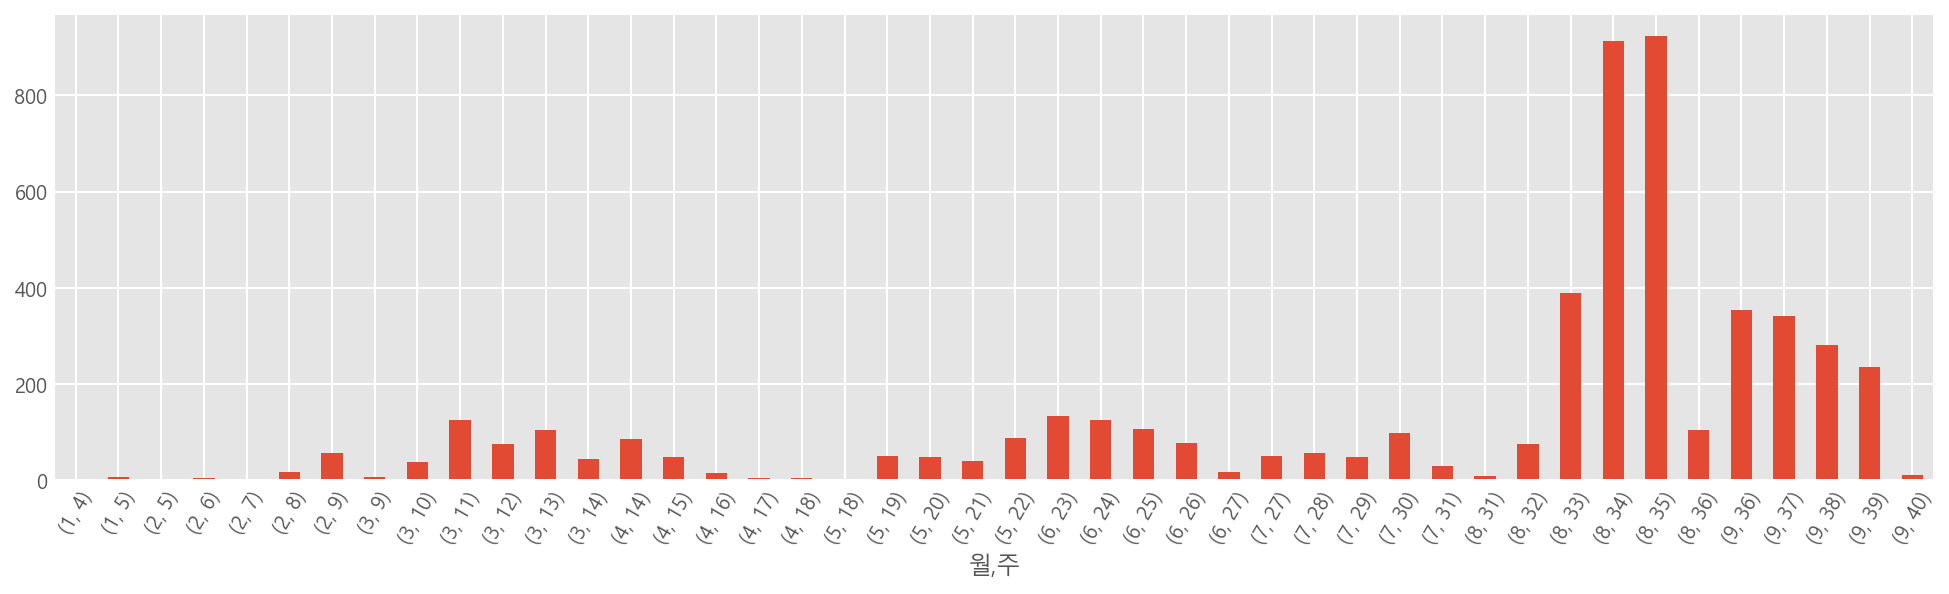

In [112]:
month_weekly_case.plot.bar(figsize = (15,4), rot = 60)
plt.show()

## 6. 모든 날짜를 행에 만들어 주기
- 확진자가 없는 날의 데이터도 만들어 준다.

In [113]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

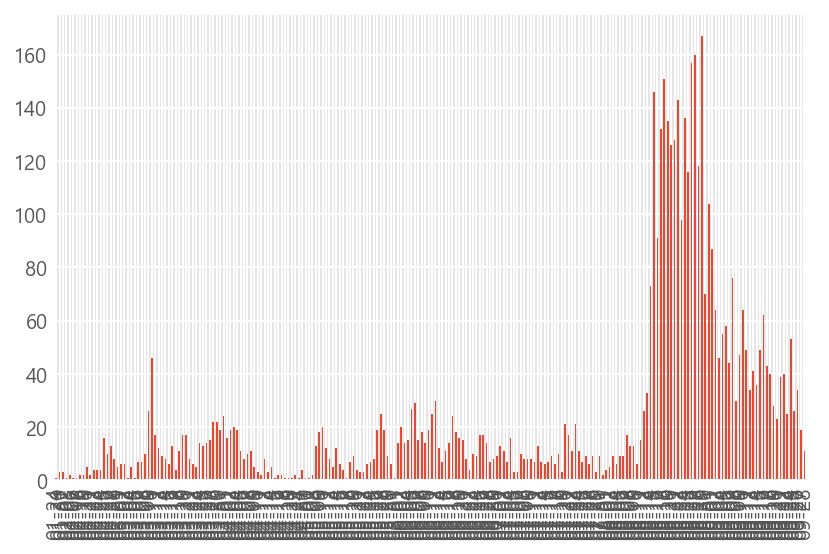

In [114]:
day_count.plot.bar()
plt.show()

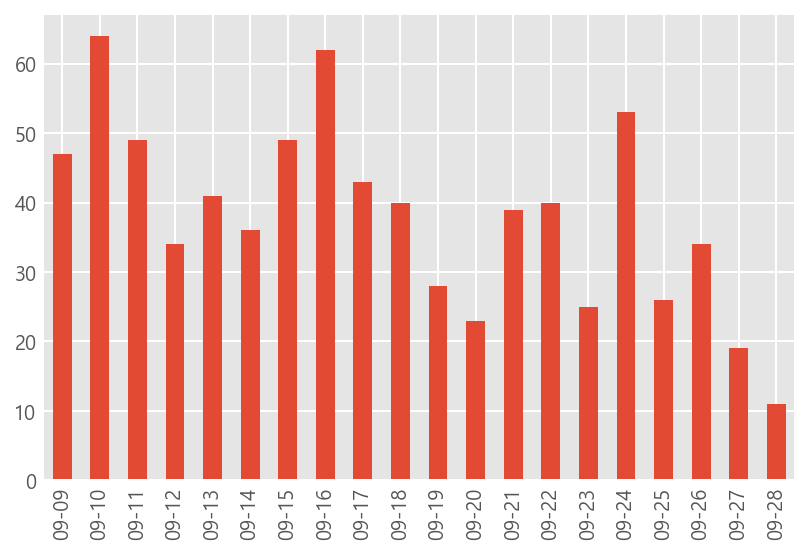

In [115]:
day_count[-20:].plot.bar() # 최근 20일의 일자별 환자수 확인
plt.show()

In [116]:
df.iloc[-1]

연번                        1
환자                        2
확진일                   1.24.
거주지                     강서구
여행력                  중국 우한시
접촉력                   해외 접촉
퇴원현황                     퇴원
확진일자    2020-01-24 00:00:00
월                         1
주                         4
월일                    01-24
Name: 5241, dtype: object

In [117]:
df.iloc[-1,7] # 확진일자만 가지고 오고 싶을 때

Timestamp('2020-01-24 00:00:00')

In [118]:
df.iloc[0]

연번                     5242
환자                    23696
확진일                   9.28.
거주지                     도봉구
여행력                       -
접촉력                도봉구 다나병원
퇴원현황                    NaN
확진일자    2020-09-28 00:00:00
월                         9
주                        40
월일                    09-28
Name: 0, dtype: object

In [119]:
df.iloc[0]['확진일자']

Timestamp('2020-09-28 00:00:00')

In [120]:
df.iloc[0,7]

Timestamp('2020-09-28 00:00:00')

In [29]:
first_day = df.iloc[-1,7]
last_day = df.iloc[0,7]

In [122]:
# 첫 확진일부터 마지막 확진일까지 가져온다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day에 담는다

%timeit first_day = df.iloc[-1,7] # 처리하는데 걸리는 시간 측정

109 µs ± 9.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [123]:
%timeit first_day = df.iloc[-1]['확진일자'] 

309 µs ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [124]:
%timeit first_day = df.iloc[0,7] 

114 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [125]:
%timeit first_day = df.iloc[0]['확진일자']

278 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의
# Datetimeindex를 만들고 days 라는 변수에 지정
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26',
               '2020-09-27', '2020-09-28'],
              dtype='datetime64[ns]', length=249, freq='D')

In [127]:
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [128]:
# dataframe 형태로 변환
days.to_frame()

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2020-09-24,2020-09-24
2020-09-25,2020-09-25
2020-09-26,2020-09-26
2020-09-27,2020-09-27


In [129]:
pd.DataFrame(days)

,0
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
244,2020-09-24
245,2020-09-25
246,2020-09-26
247,2020-09-27


In [130]:
pd.DataFrame({'확진일자':days})

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
244,2020-09-24
245,2020-09-25
246,2020-09-26
247,2020-09-27


In [31]:
# days 변수의 값으로 '연월일' 이라는 컬럼이름을 갖는 데이터프레임을 만든다.
# days.to_frame()
df_days = pd.DataFrame({'확진일자': days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [32]:
# 확진일자별로 빈도수 구하기
daily_case = df['확진일자'].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [33]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [34]:
# value_counts 결과의 컬럼명을 '확진수'로 바꾸기
df_daily_case.columns = ['확진수']
df_daily_case.head()

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


merge를 통해 전체 확진일자 만들기

In [ ]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge로 합쳐준다.
#df_days.merge()

In [35]:
# key 값을 '확진일자'로 왼쪽 테이블을 사용하고 key 값을 daily_case.index (index 값을 기준)으로 병합(merge)
# default : inner join
all_day = df_days.merge(df_daily_case,
                       left_on = '확진일자',
                       right_on = df_daily_case.index)
all_day.head(10)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
5,2020-02-06,1
6,2020-02-07,1
7,2020-02-16,2
8,2020-02-19,2
9,2020-02-20,5


In [36]:
# 모든 '확진일자'별 확진자수를 알고 싶기 때문에 how = 'left' 사용
all_day = df_days.merge(df_daily_case,
                       left_on = '확진일자',
                       right_on = df_daily_case.index,
                       how = 'left')
all_day.head(10)

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
5,2020-01-29,NaN
6,2020-01-30,3.0
7,2020-01-31,3.0
8,2020-02-01,NaN
9,2020-02-02,1.0


## 7. 누적 확진자 수 구하기

In [37]:
all_day['확진수'].head()

0    1.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: 확진수, dtype: float64

In [38]:
all_day['확진수'].fillna(0)

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
244    53.0
245    26.0
246    34.0
247    19.0
248    11.0
Name: 확진수, Length: 249, dtype: float64

In [39]:
all_day['확진수'] = all_day['확진수'].fillna(0).astype(int)

In [40]:
# 누적해서 더해줌

all_day['누적확진'] = all_day['확진수'].fillna(0).astype(int).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1,1
1,2020-01-25,0,1
2,2020-01-26,0,1
3,2020-01-27,0,1
4,2020-01-28,0,1
...,...,...,...
244,2020-09-24,53,5152
245,2020-09-25,26,5178
246,2020-09-26,34,5212
247,2020-09-27,19,5231


In [41]:
# 연도를 제외하고 월-일로 '일자' 컬럼 만들기
all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x: x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1,1,01-24
1,2020-01-25,0,1,01-25
2,2020-01-26,0,1,01-26
3,2020-01-27,0,1,01-27
4,2020-01-28,0,1,01-28


In [42]:
cum_day = all_day[['일자','확진수','누적확진']]
cum_day.head()

,일자,확진수,누적확진
0,01-24,1,1
1,01-25,0,1
2,01-26,0,1
3,01-27,0,1
4,01-28,0,1


In [43]:
cum_day = cum_day.set_index('일자')
cum_day.head()

,확진수,누적확진
일자,,
01-24,1,1
01-25,0,1
01-26,0,1
01-27,0,1
01-28,0,1


데이터프레임으로 그리기

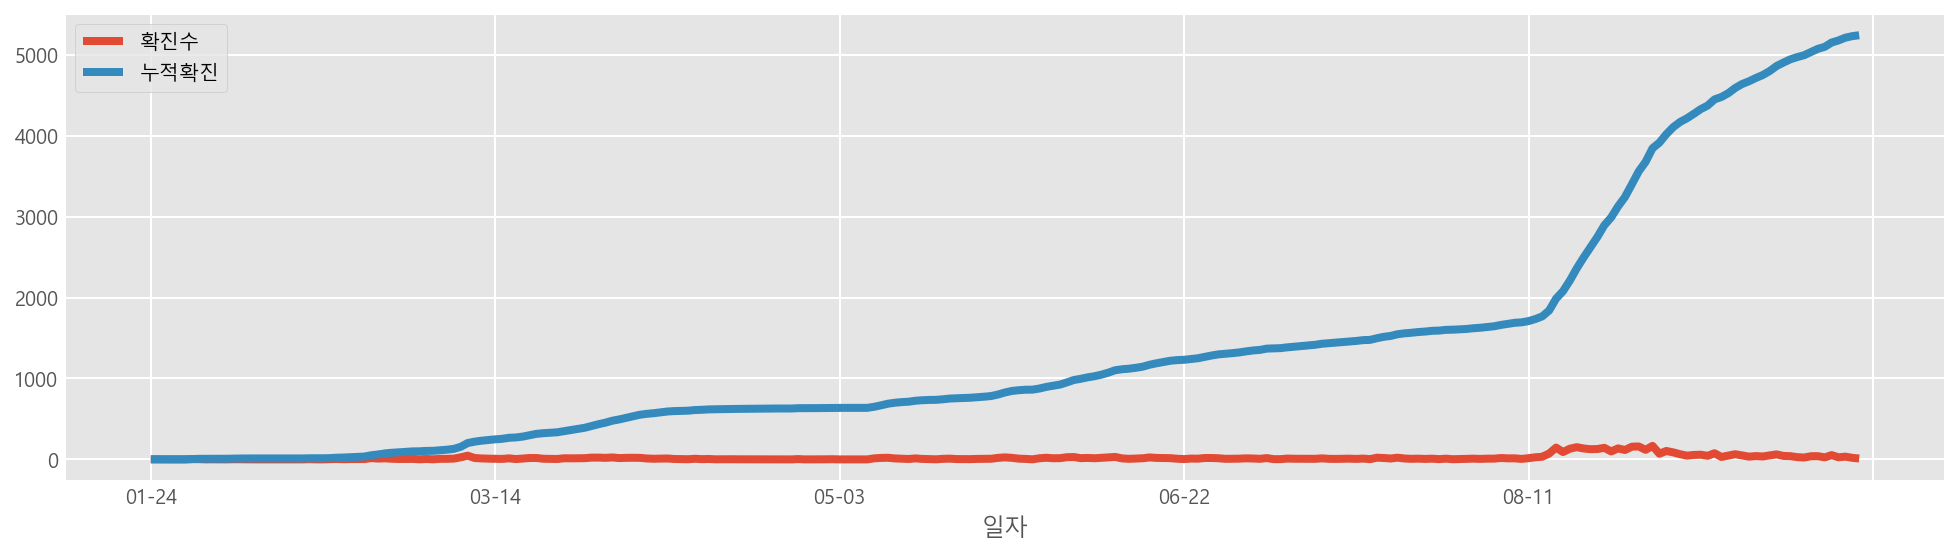

In [158]:
# 데이터프레임으로 확진자수와 누적확진을 선그래프로 그린다.

cum_day.plot(figsize = (15,4))
plt.show()

시리즈로 그리기

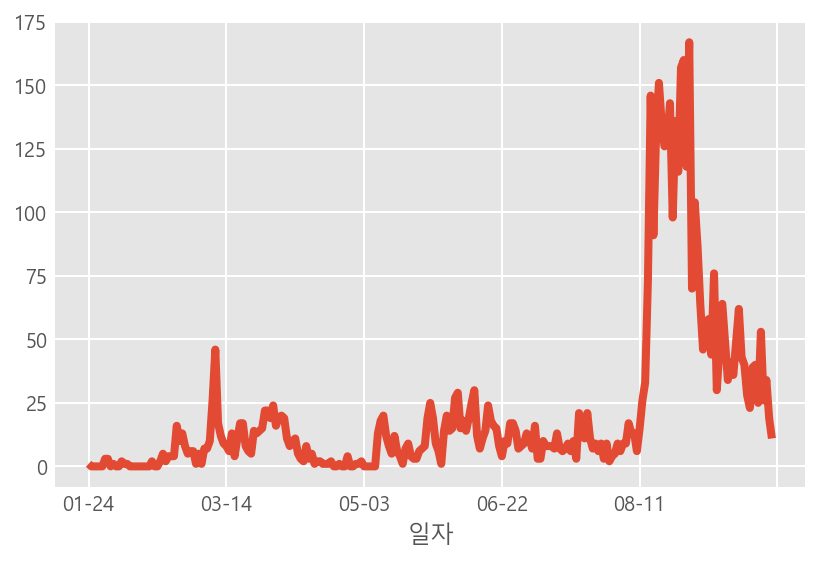

In [159]:
cum_day['확진수'].plot()
plt.show()

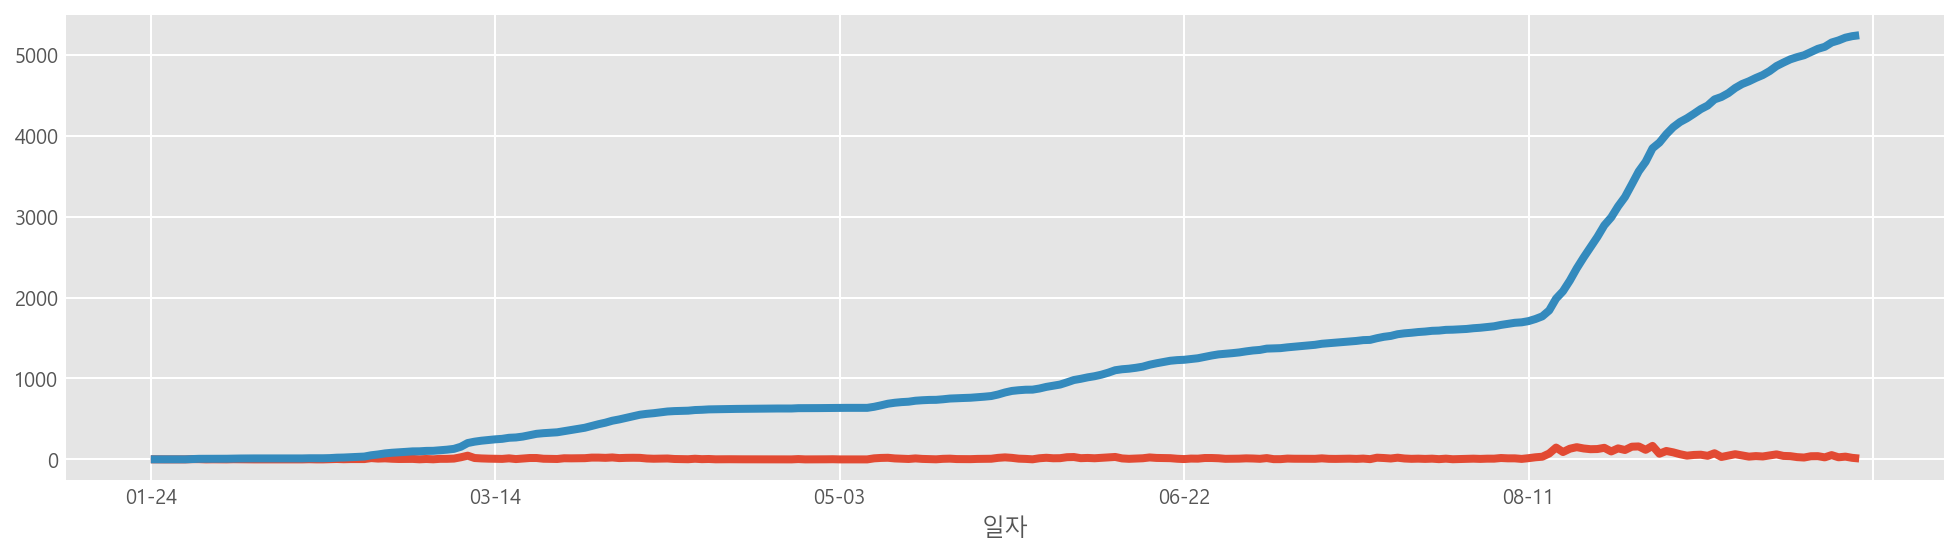

In [161]:
# 시리즈로 2개의 그래프 그리기
cum_day['확진수'].plot()
cum_day['누적확진'].plot(figsize = (15,4))
plt.show()

확진수만 따로 그리기

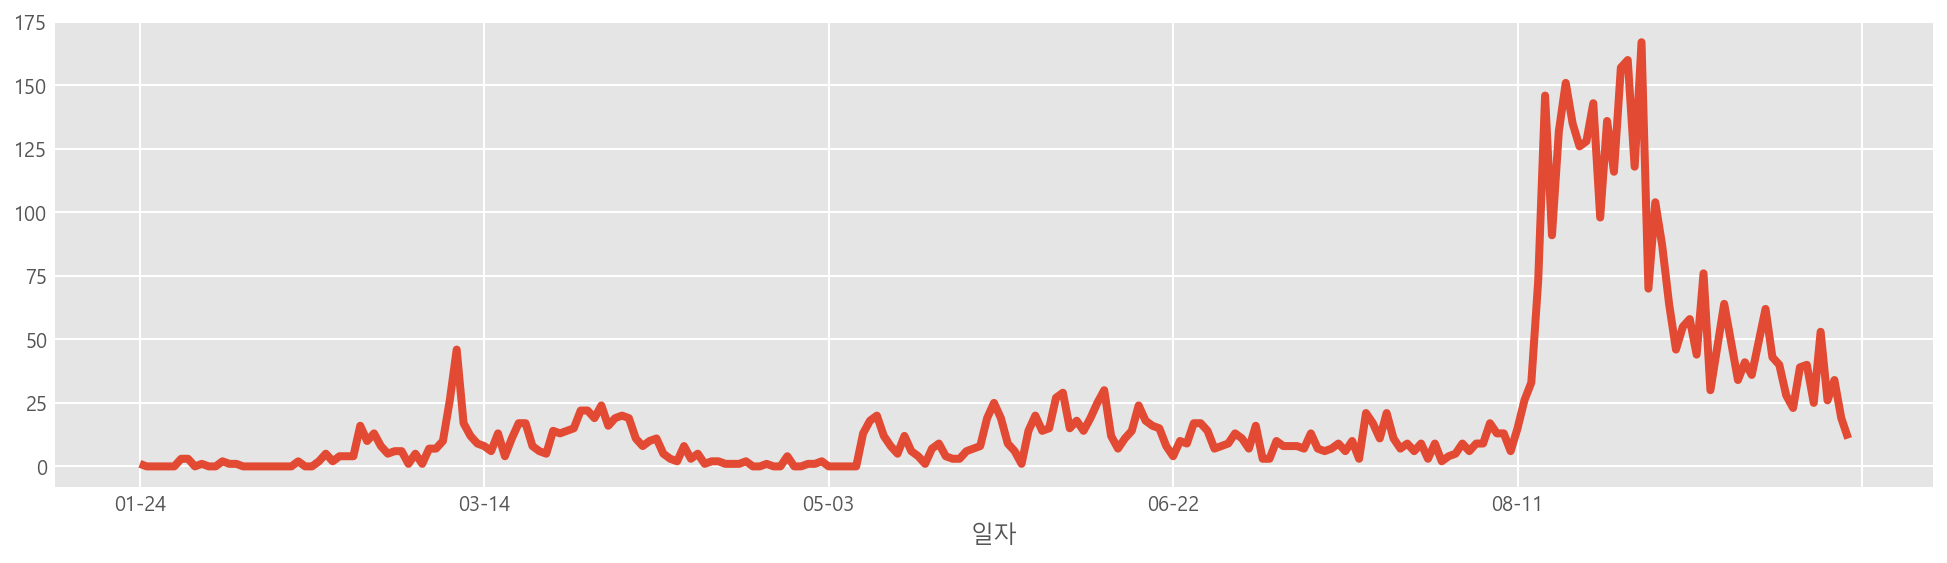

In [163]:
# 누적확진자수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그린다.
cum_day['확진수'].plot(figsize = (15,4))
plt.show()

누적확진만 따로 그리기

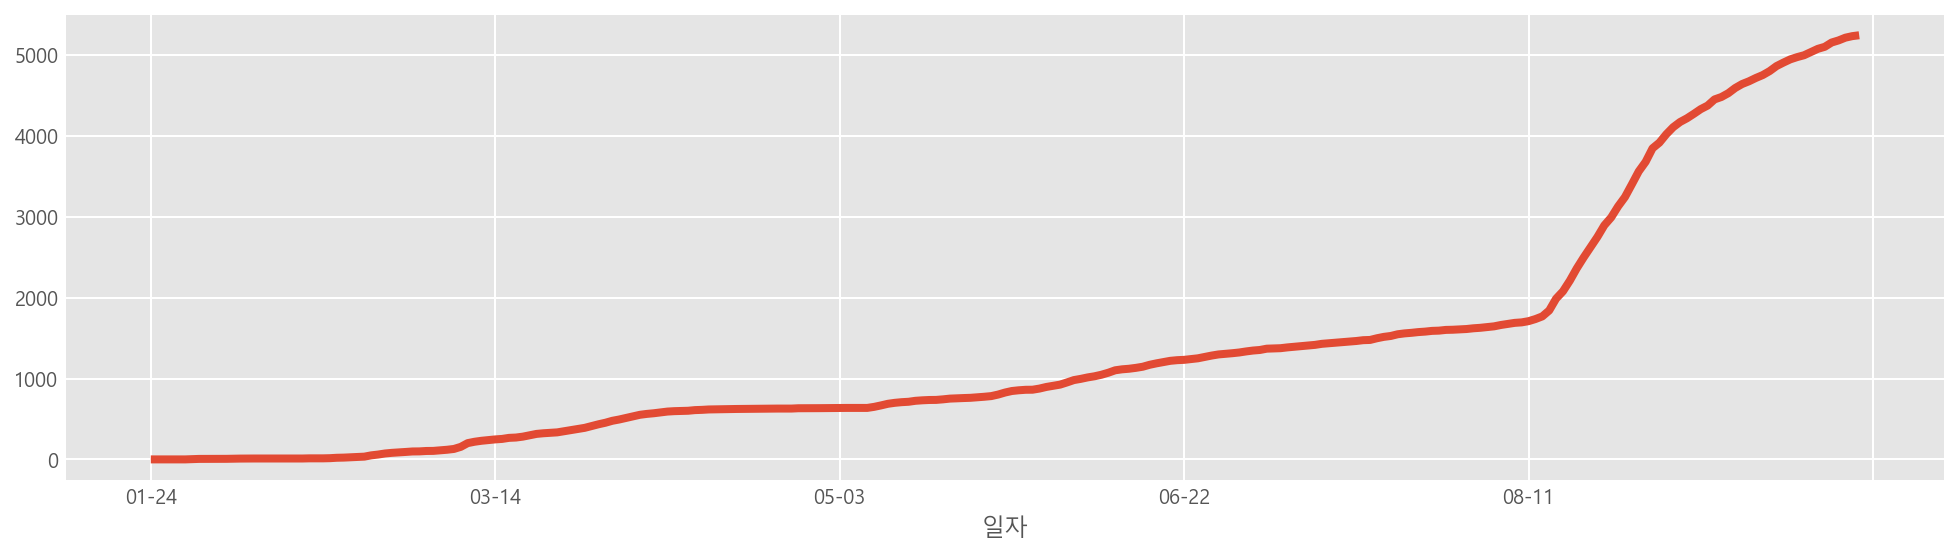

In [164]:
cum_day['누적확진'].plot(figsize = (15,4))
plt.show()

로그스케일
- 차이가 너무 커서 그래프가 자세히 보이지 않을 때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [165]:
np.log(cum_day['누적확진']+1)
# 로그값이 (-) 무한대로 수렴하는 경향이 있어 이를 방지하기 위해 +1 더하기도 함

일자
01-24    0.693147
01-25    0.693147
01-26    0.693147
01-27    0.693147
01-28    0.693147
           ...   
09-24    8.547334
09-25    8.552367
09-26    8.558911
09-27    8.562549
09-28    8.564649
Name: 누적확진, Length: 249, dtype: float64

C:\Users\khb16\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


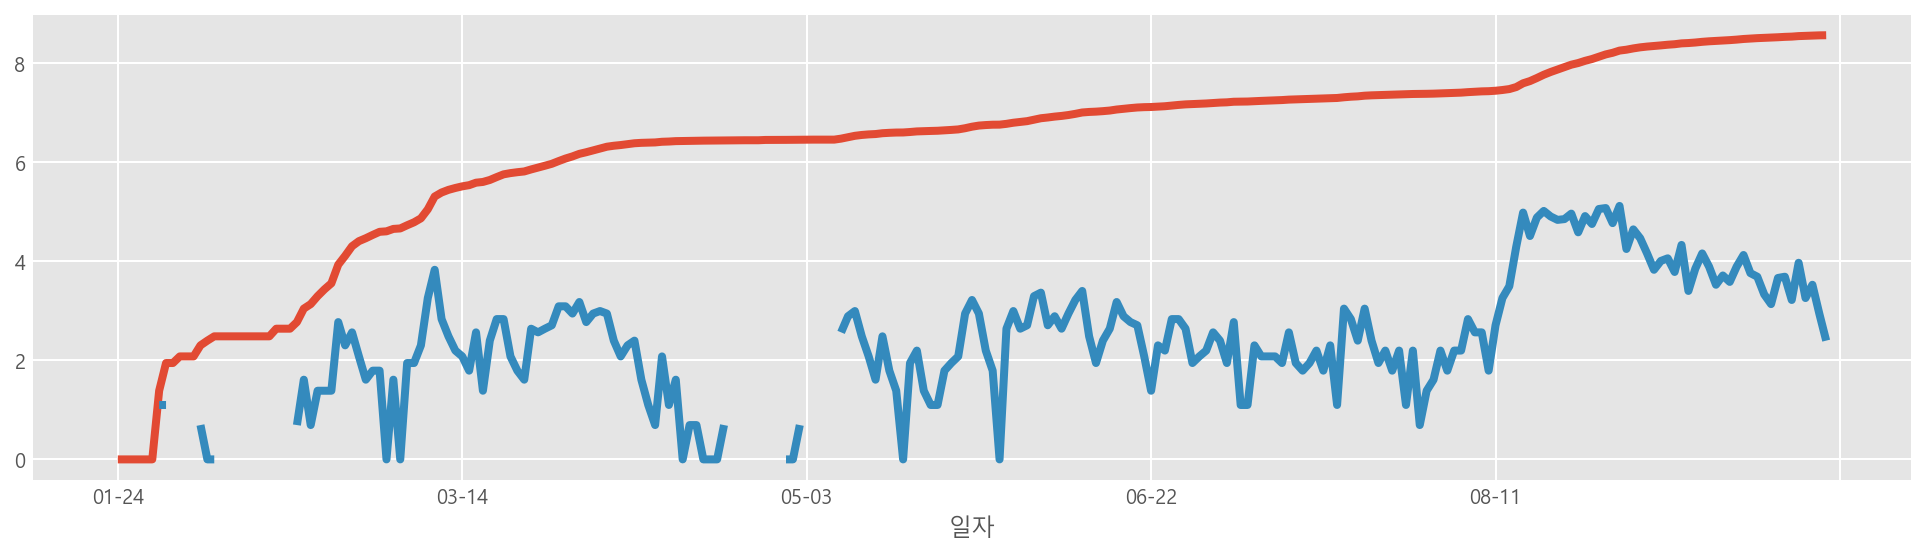

In [167]:
np.log(cum_day['누적확진']).plot(figsize = (15,4))
np.log(cum_day['확진수']).plot()
plt.show()

## 8. 확진월과 요일 구하기

요일별 확진수

In [44]:
all_day['확진일자'].dt.month

0      1
1      1
2      1
3      1
4      1
      ..
244    9
245    9
246    9
247    9
248    9
Name: 확진일자, Length: 249, dtype: int64

In [45]:
# cum_day
# 확진요일 때 '월'요일이 0이 됨

all_day['확진월'] = all_day['확진일자'].dt.month
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1,1,01-24,1,4
1,2020-01-25,0,1,01-25,1,5
2,2020-01-26,0,1,01-26,1,6
3,2020-01-27,0,1,01-27,1,0
4,2020-01-28,0,1,01-28,1,1


In [46]:
all_day.groupby(['확진월','확진요일']).sum()

확진수   누적확진
확진월 확진요일            
1   0       0      1
    1       0      1
    2       0      1
    3       3      4
    4       4      8
...       ...    ...
9   2     198  18656
    3     206  18862
    4     170  19032
    5     154  19186
    6     127  19313

[63 rows x 2 columns]

In [48]:
all_day.groupby(['확진월','확진요일'])['확진수'].head()

0       1
1       0
2       0
3       0
4       0
       ..
244    53
245    26
246    34
247    19
248    11
Name: 확진수, Length: 249, dtype: int32

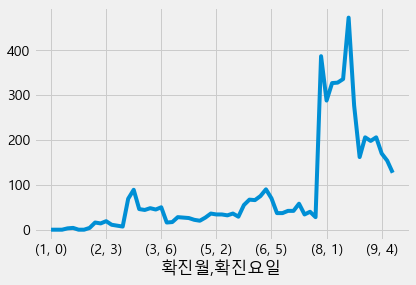

In [52]:
all_day_week = all_day.groupby(['확진월','확진요일'])['확진수'].sum().plot()
all_day_week
plt.show()

In [ ]:
# 행과 열을 바꾸어 주기 위해 unstack() 모듈 사용
# 데이터 타입을 정수(integer)로 변경

In [53]:
all_day_week = all_day.groupby(['확진월','확진요일'])['확진수'].sum()
print(all_day_week.index)

MultiIndex([(1, 0),
            (1, 1),
            (1, 2),
            (1, 3),
            (1, 4),
            (1, 5),
            (1, 6),
            (2, 0),
            (2, 1),
            (2, 2),
            (2, 3),
            (2, 4),
            (2, 5),
            (2, 6),
            (3, 0),
            (3, 1),
            (3, 2),
            (3, 3),
            (3, 4),
            (3, 5),
            (3, 6),
            (4, 0),
            (4, 1),
            (4, 2),
            (4, 3),
            (4, 4),
            (4, 5),
            (4, 6),
            (5, 0),
            (5, 1),
            (5, 2),
            (5, 3),
            (5, 4),
            (5, 5),
            (5, 6),
            (6, 0),
            (6, 1),
            (6, 2),
            (6, 3),
            (6, 4),
            (6, 5),
            (6, 6),
            (7, 0),
            (7, 1),
            (7, 2),
            (7, 3),
            (7, 4),
            (7, 5),
            (7, 6),
            (8, 0),


In [54]:
all_day_week.unstack()

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


In [55]:
# 월별,요일별 확진수를 groupby로 구하기

all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


In [56]:
# 숫자로 표현한 요일을 문자로 바꿔주기 위해 split을 통해 문자를 리스트로 변경한다.
dayofweek = '월 화 수 목 금 토 일'
dayofweek.split()

['월', '화', '수', '목', '금', '토', '일']

In [57]:
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [58]:
# 컬럼의 이름을 한글요일명으로 변경해준다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


In [59]:
# cmap은 matplotlib의 library임
# style.background_gradient로 색상을 표현
all_day_week.style.background_gradient(cmap = 'Blues')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


In [60]:
all_day_week.style.background_gradient(cmap = 'Greens')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


In [61]:
all_day_week.style.background_gradient(cmap = 'Reds_r')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,162,206,198,206,170,154,127


## 9. 거주지별 확진자

In [62]:
df['거주지']

0        도봉구
1        도봉구
2        관악구
3       영등포구
4        성북구
        ... 
5237     성북구
5238     마포구
5239     종로구
5240     중랑구
5241     강서구
Name: 거주지, Length: 5242, dtype: object

In [63]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화
gu_count = df['거주지'].value_counts()
gu_count.head()

관악구    380
송파구    337
성북구    332
노원구    302
강서구    283
Name: 거주지, dtype: int64

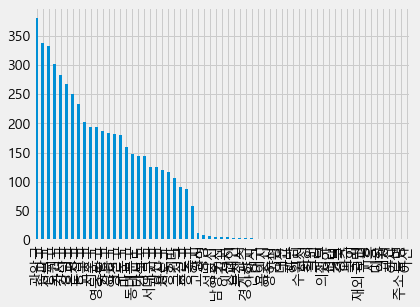

In [65]:
gu_count.plot.bar()
plt.show()

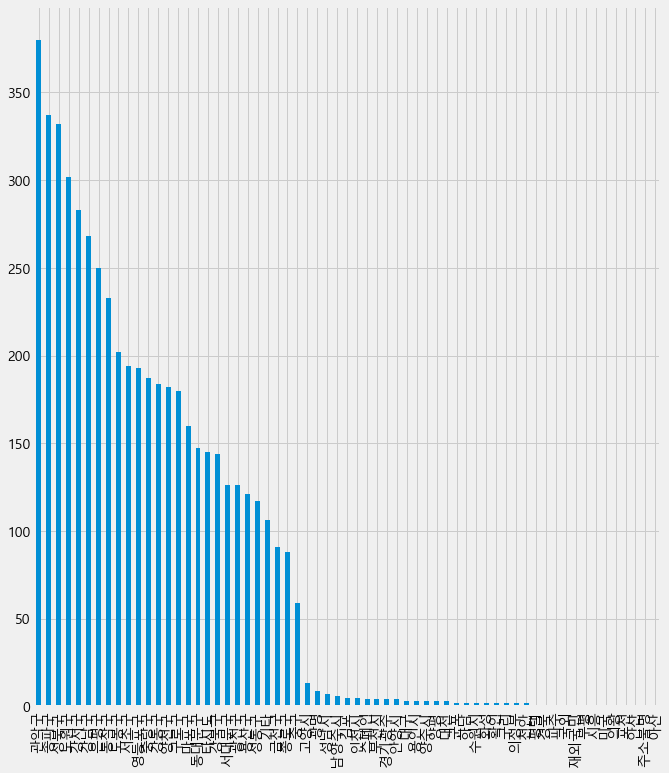

In [66]:
gu_count.plot.bar(figsize = (10,12))
plt.show()

In [67]:
gu_count.sort_values()

아산       1
평택       1
경북       1
파주       1
국외       1
      ... 
강서구    283
노원구    302
성북구    332
송파구    337
관악구    380
Name: 거주지, Length: 63, dtype: int64

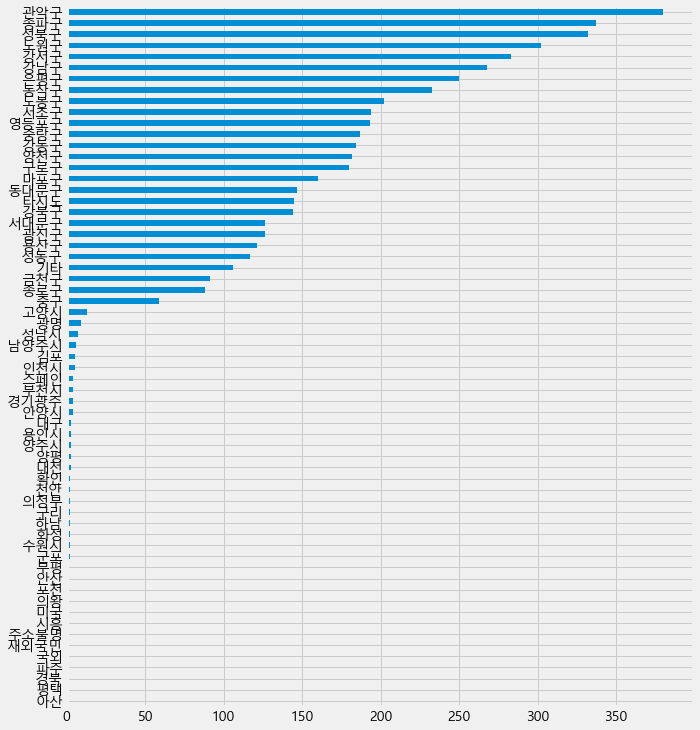

In [68]:
# 구별 확진자의 수를 시각화한다.
gu_count.sort_values().plot.barh(figsize = (10,12))
plt.show()

In [69]:
# 서울시 거주지와 서울시 비거주지와 구분 작업
# 서울시는 25개의 구가 있음
# 서울 외 타시도, 기타가 집계에 나타남

gu_count[:25]

관악구     380
송파구     337
성북구     332
노원구     302
강서구     283
강남구     268
은평구     250
동작구     233
도봉구     202
서초구     194
영등포구    193
중랑구     187
강동구     184
양천구     182
구로구     180
마포구     160
동대문구    147
타시도     145
강북구     144
서대문구    126
광진구     126
용산구     121
성동구     117
기타      106
금천구      91
Name: 거주지, dtype: int64

In [70]:
gu_count[:25].index

Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구', '서초구',
       '영등포구', '중랑구', '강동구', '양천구', '구로구', '마포구', '동대문구', '타시도', '강북구', '서대문구',
       '광진구', '용산구', '성동구', '기타', '금천구'],
      dtype='object')

In [71]:
gu_count[:27].index

Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구', '서초구',
       '영등포구', '중랑구', '강동구', '양천구', '구로구', '마포구', '동대문구', '타시도', '강북구', '서대문구',
       '광진구', '용산구', '성동구', '기타', '금천구', '종로구', '중구'],
      dtype='object')

In [73]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있다.
# 거주지 별로 서울시에 해당하는 데이터만 따로 가져온다.

gu = gu_count[:27].drop(labels = ['타시도','기타'])
gu

관악구     380
송파구     337
성북구     332
노원구     302
강서구     283
강남구     268
은평구     250
동작구     233
도봉구     202
서초구     194
영등포구    193
중랑구     187
강동구     184
양천구     182
구로구     180
마포구     160
동대문구    147
강북구     144
서대문구    126
광진구     126
용산구     121
성동구     117
금천구      91
종로구      88
중구       59
Name: 거주지, dtype: int64

In [74]:
gu = gu_count[:27].drop(labels = ['타시도','기타']).index
gu

Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '도봉구', '서초구',
       '영등포구', '중랑구', '강동구', '양천구', '구로구', '마포구', '동대문구', '강북구', '서대문구', '광진구',
       '용산구', '성동구', '금천구', '종로구', '중구'],
      dtype='object')

In [75]:
# 거주지가 서울이 아닌 지역을 따로 추출
set(gu_count.index) - set(gu)

{'경기광주',
 '경북',
 '고양시',
 '광명',
 '구리',
 '국외',
 '군포',
 '기타',
 '김포',
 '남양주시',
 '대구',
 '대전',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥',
 '아산',
 '안산',
 '안양시',
 '양주시',
 '양평',
 '용인시',
 '의왕',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안',
 '타시도',
 '파주',
 '평택',
 '포천',
 '하남',
 '화성',
 '확인'}

In [76]:
gu_count
# series 형태

관악구     380
송파구     337
성북구     332
노원구     302
강서구     283
       ... 
의왕        1
포천        1
안산        1
주소불명      1
아산        1
Name: 거주지, Length: 63, dtype: int64

In [77]:
# 데이터 프레임으로 변형
gu_count.to_frame()

,거주지
관악구,380
송파구,337
성북구,332
노원구,302
강서구,283
...,...
의왕,1
포천,1
안산,1
주소불명,1


In [78]:
pd.DataFrame(gu_count)

,거주지
관악구,380
송파구,337
성북구,332
노원구,302
강서구,283
...,...
의왕,1
포천,1
안산,1
주소불명,1


In [79]:
# 또 다른 방법! reset_index 활용
# reset_index() : 행 인덱스를 정수형 위치 인덱스로 초기화
# 이 때, 기존 행 인덱스는 열로 이동

gu_count.reset_index()

,index,거주지
0,관악구,380
1,송파구,337
2,성북구,332
3,노원구,302
4,강서구,283
...,...,...
58,의왕,1
59,포천,1
60,안산,1
61,주소불명,1


In [80]:
# 구를 전처리 하기 쉽게 컬럼으로 벼환하기 위해 reset_index로 변환
df_gu = gu_count.reset_index()
df_gu.columns = ['구', '확진수']
df_gu.head()

,구,확진수
0,관악구,380
1,송파구,337
2,성북구,332
3,노원구,302
4,강서구,283


In [ ]:
# df_gu[~df_gu['구'].isin(gu)]
# '구'에 해당하는 값만 가지고 옴

In [81]:
df_gu['구'].isin(gu)
# boolean으로 변환(서울에 해당하면 True, 서울 외 False)

0      True
1      True
2      True
3      True
4      True
      ...  
58    False
59    False
60    False
61    False
62    False
Name: 구, Length: 63, dtype: bool

In [82]:
# 서울 거주 확진자만 보고 싶을 때
df_gu[df_gu['구'].isin(gu)]

,구,확진수
0,관악구,380
1,송파구,337
2,성북구,332
3,노원구,302
4,강서구,283
5,강남구,268
6,은평구,250
7,동작구,233
8,도봉구,202
9,서초구,194


In [83]:
# 서울 외 거주 확진자만 보고 싶을 때
df_gu[~df_gu['구'].isin(gu)]

,구,확진수
17,타시도,145
23,기타,106
27,고양시,13
28,광명,9
29,성남시,7
30,남양주시,6
31,김포,5
32,인천시,5
33,스페인,4
34,부천시,4


In [84]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28
...,...,...,...,...,...,...,...,...,...,...,...
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30


In [85]:
df['거주지']

0        도봉구
1        도봉구
2        관악구
3       영등포구
4        성북구
        ... 
5237     성북구
5238     마포구
5239     종로구
5240     중랑구
5241     강서구
Name: 거주지, Length: 5242, dtype: object

In [86]:
df[df['거주지'].isin(gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28
...,...,...,...,...,...,...,...,...,...,...,...
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30


In [87]:
df[~df['거주지'].isin(gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
36,5206,23586,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26
37,5205,23571,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26
38,5204,23570,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26
52,5190,23553,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26
63,5179,23539,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26
...,...,...,...,...,...,...,...,...,...,...,...
5203,39,924,2.25.,평택,-,확인중,퇴원,2020-02-25,2,9,02-25
5207,35,870,2.25.,김포,-,확인중,퇴원,2020-02-25,2,9,02-25
5224,18,111,2.20.,대구,-,대구 거주자,퇴원,2020-02-20,2,8,02-20
5230,12,24,2.7.,아산,우한교민,해외 접촉,퇴원,2020-02-07,2,6,02-07


In [ ]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# '지역'이라는 새로운 칼럼을 만들어 서울지역이 아니라면 '타지역' 이라는 값을 넣어 준다.
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
# df.loc[~df['거주지'].isin(gu)]
# df.loc[df['지역'].isnull(), '지역'] = '타지역'

In [88]:
df.loc[df['거주지'].isin(gu), '지역'] = df['거주지']
df
# '지역' 컬럼 생성

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28,도봉구
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28,도봉구
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28,관악구
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28,영등포구
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [89]:
df['지역'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5237    False
5238    False
5239    False
5240    False
5241    False
Name: 지역, Length: 5242, dtype: bool

In [90]:
df[df['지역'].isnull()]
# NaN으로 값이 나오는 것은 서울 외 지역임

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
36,5206,23586,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,NaN
37,5205,23571,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,NaN
38,5204,23570,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,NaN
52,5190,23553,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,NaN
63,5179,23539,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5203,39,924,2.25.,평택,-,확인중,퇴원,2020-02-25,2,9,02-25,NaN
5207,35,870,2.25.,김포,-,확인중,퇴원,2020-02-25,2,9,02-25,NaN
5224,18,111,2.20.,대구,-,대구 거주자,퇴원,2020-02-20,2,8,02-20,NaN
5230,12,24,2.7.,아산,우한교민,해외 접촉,퇴원,2020-02-07,2,6,02-07,NaN


In [91]:
df['지역'] = df['지역'].fillna('타지역')
df['지역']

0        도봉구
1        도봉구
2        관악구
3       영등포구
4        성북구
        ... 
5237     성북구
5238     마포구
5239     종로구
5240     중랑구
5241     강서구
Name: 지역, Length: 5242, dtype: object

In [92]:
df['지역'].unique()

array(['도봉구', '관악구', '영등포구', '성북구', '동대문구', '동작구', '은평구', '강동구', '강남구',
       '구로구', '광진구', '송파구', '서대문구', '용산구', '강서구', '타지역', '중랑구', '중구',
       '노원구', '서초구', '종로구', '금천구', '양천구', '강북구', '성동구', '마포구'],
      dtype=object)

In [93]:
df.loc[~df['거주지'].isin(gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
36,5206,23586,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,타지역
37,5205,23571,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,타지역
38,5204,23570,9.26.,타시도,-,신도림 역사 관련,NaN,2020-09-26,9,39,09-26,타지역
52,5190,23553,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,타지역
63,5179,23539,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...
5203,39,924,2.25.,평택,-,확인중,퇴원,2020-02-25,2,9,02-25,타지역
5207,35,870,2.25.,김포,-,확인중,퇴원,2020-02-25,2,9,02-25,타지역
5224,18,111,2.20.,대구,-,대구 거주자,퇴원,2020-02-20,2,8,02-20,타지역
5230,12,24,2.7.,아산,우한교민,해외 접촉,퇴원,2020-02-07,2,6,02-07,타지역


In [94]:
# 위의 방법으로 할수도 있고, 아래의 방법으로 만들수도 있다.
# 함수 혹은 익명함수(lambda)를 사용하는 방법으로 '타지역' 값을 만들 수도 있다.
df['지역'] = df['거주지'].map(lambda x:x if x in gu else '타지역')
df['지역']

0        도봉구
1        도봉구
2        관악구
3       영등포구
4        성북구
        ... 
5237     성북구
5238     마포구
5239     종로구
5240     중랑구
5241     강서구
Name: 지역, Length: 5242, dtype: object

In [96]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28,도봉구
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN,2020-09-28,9,40,09-28,도봉구
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28,관악구
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN,2020-09-28,9,40,09-28,영등포구
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [97]:
df[['거주지','지역']]

,거주지,지역
0,도봉구,도봉구
1,도봉구,도봉구
2,관악구,관악구
3,영등포구,영등포구
4,성북구,성북구
...,...,...
5237,성북구,성북구
5238,마포구,마포구
5239,종로구,종로구
5240,중랑구,중랑구


In [98]:
df['지역'].value_counts()

관악구     380
타지역     356
송파구     337
성북구     332
노원구     302
강서구     283
강남구     268
은평구     250
동작구     233
도봉구     202
서초구     194
영등포구    193
중랑구     187
강동구     184
양천구     182
구로구     180
마포구     160
동대문구    147
강북구     144
서대문구    126
광진구     126
용산구     121
성동구     117
금천구      91
종로구      88
중구       59
Name: 지역, dtype: int64

In [99]:
# 서울시 구와 타지역 반영해서 지역 컬럼으로 정함
gu_etc = df['지역']

In [100]:
# '지역' 컬럼으로 확진자 빈도수를 구한다.
gu_etc_count = df['지역'].value_counts()
gu_etc_count

관악구     380
타지역     356
송파구     337
성북구     332
노원구     302
강서구     283
강남구     268
은평구     250
동작구     233
도봉구     202
서초구     194
영등포구    193
중랑구     187
강동구     184
양천구     182
구로구     180
마포구     160
동대문구    147
강북구     144
서대문구    126
광진구     126
용산구     121
성동구     117
금천구      91
종로구      88
중구       59
Name: 지역, dtype: int64

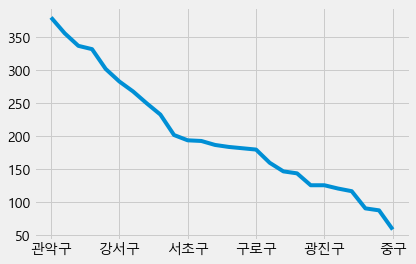

In [101]:
gu_etc_count.plot()
plt.show()

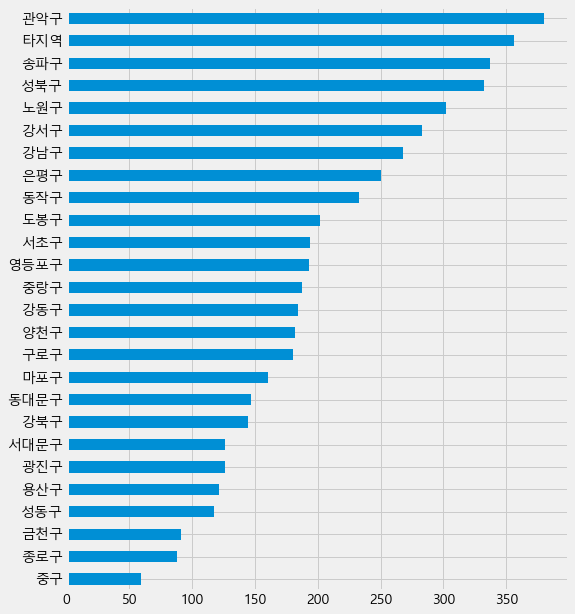

In [102]:
# 위에서 구한 빈도수를 막대그래프로 그린다.
# method chaining 활용
gu_etc_count.sort_values().plot.barh(figsize = (8,10))
plt.show()

## 10. 접촉력

In [103]:
df['접촉력']

0        도봉구 다나병원
1        도봉구 다나병원
2        확진자 조사 중
3        확진자 조사 중
4       기타 확진자 접촉
          ...    
5237        #5 접촉
5238        해외 접촉
5239        #3 접촉
5240        해외 접촉
5241        해외 접촉
Name: 접촉력, Length: 5242, dtype: object

In [104]:
# 접촉력 빈도수 구하기
df['접촉력'].value_counts().head(20)

확인 중             872
기타 확진자 접촉        724
성북구 사랑제일교회 관련    641
해외 접촉 추정         390
타시도 확진자 접촉       214
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
양천구 운동시설 관련       43
성북구 체대입시 관련       43
요양시설 관련           43
확인중               42
용인시 우리제일교회 관련     41
구로구 교회 관련         41
서대문구 세브란스병원       39
콜센터직원 접촉          37
강남구 K보건산업         37
극단 산 관련           37
Name: 접촉력, dtype: int64

In [105]:
# 접촉력의 unique 값만 구하기
df['접촉력'].unique()

array(['도봉구 다나병원', '확진자 조사 중', '기타 확진자 접촉', '강남구 소재 대우디오빌플러스',
       '관악구 삼모스포렉스', '신도림 역사 관련', '도봉구 예마루데이케어센터', '강남구 디와이디벨로먼트',
       '동대문구 성경모임', '확인 중', '송파구 우리교회', '해외 접촉 추정', '타시도 확진자 접촉',
       '중랑구 서울의료원', '종로구 서울대병원', '관악구 사랑나무 어린이집', '성동구 덕수고 야구부',
       '프로그래머 지인모임', '강남구 신도벤처타워', '영등포구 LG트윈타워', '관악구 삼모스포렉스 사우나',
       '강남구 K보건산업', '건축설명회', '종로구청 관련', '강남구 통신판매업', '도봉구 소재 아파트 관련',
       '관악구 지인모임', '영등포 소재 증권회사', '도봉구 소재 아파트', '서대문구 세브란스병원',
       '강남구 소재 금융회사', '동작구 요양시설 관련', '양천구 양천경찰서', '은평구 수색성당',
       '서울지방국세청 관련', '수도권 지인모임', '서대문구 지인모임', '영등포 지인모임', '관악구 에바다 관련',
       '광진구 혜민병원', '8.15서울도심집회', '도봉구 건설현장', '도봉구 운동시설', '송파구 쿠팡 관련',
       '노원구 빛가온교회 관련', '서초구 장애인교육시설', '강동구 BF모바일 관련', '영등포구 일련정종 서울포교소',
       '동작구 진흥글로벌', '구로구 아파트 관련', 'KT가좌지사 관련', '성북구 사랑제일교회 관련',
       '노원구 기도모임', '관악구 가족모임', '영등포구 국회출입기자관련', '은평구 헤어콕 관련', '송파구 소재병원',
       '극단 산 관련', '영등포구 권능교회', '강동구 소재 병원', '다래경매 관련', '성북구 체대입시 관련',
       '성북구 요양시설', '중구소재 은행 관련', '중랑구 소재 체육시설', '동작구 

In [106]:
# '확인'이 들어가는 접촉력만 찾기
df[df['접촉력'].str.contains('확인')]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
32,5210,23607,9.26.,관악구,-,확인 중,NaN,2020-09-26,9,39,09-26,관악구
34,5208,23589,9.26.,강동구,-,확인 중,NaN,2020-09-26,9,39,09-26,강동구
50,5192,23574,9.26.,송파구,-,확인 중,NaN,2020-09-26,9,39,09-26,송파구
52,5190,23553,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,타지역
57,5185,23562,9.26.,도봉구,-,확인 중,NaN,2020-09-26,9,39,09-26,도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...
5186,56,1768,2.25.,고양시,-,확인중,퇴원,2020-02-25,2,9,02-25,타지역
5200,42,1370,2.25.,노원구,-,확인중,퇴원,2020-02-25,2,9,02-25,노원구
5203,39,924,2.25.,평택,-,확인중,퇴원,2020-02-25,2,9,02-25,타지역
5204,38,907,2.25.,관악구,-,확인중,퇴원,2020-02-25,2,9,02-25,관악구


In [108]:
df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()
# loc[조건, column]

array(['확인 중', '확인중'], dtype=object)

In [109]:
# '확인 중', '확인중' => '확인 중'으로 변경
df.loc[df['접촉력'].str.contains('확인'), '접촉력'] = '확인 중'

In [110]:
# '확인'이 들어가는 접촉력만 찾기
df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중'], dtype=object)

In [111]:
# 접촉력 빈도수를 시각화
contact_count = df['접촉력'].value_counts()
contact_count.head(50)

확인 중               914
기타 확진자 접촉          724
성북구 사랑제일교회 관련      641
해외 접촉 추정           390
타시도 확진자 접촉         214
이태원 클럽 관련          139
8.15서울도심집회         126
리치웨이 관련            119
구로구 콜센터 관련          60
노원구 빛가온교회 관련        46
요양시설 관련             43
성북구 체대입시 관련         43
양천구 운동시설 관련         43
구로구 교회 관련           41
용인시 우리제일교회 관련       41
서대문구 세브란스병원         39
수도권 개척교회 관련         37
콜센터직원 접촉            37
강남구 K보건산업           37
극단 산 관련             37
구로구 아파트 관련          36
강남구 사무실 관련          36
용인시 우리제일교회          33
동작구 소재 서울신학교        32
동작구 진흥글로벌           31
왕성교회 관련             30
여의도 순복음교회 관련        29
동대문구 관련             28
강동구 BF모바일 관련        25
도봉구 예마루데이케어센터       25
부천시 쿠팡 관련           24
골드트레인               23
강남구 소재 대우디오빌플러스     23
영등포구 일련정종 서울포교소     22
해외 접촉               22
롯데리아 종사자 모임         22
관악구 삼모스포렉스 사우나      20
광진구 혜민병원            20
동대문구 성경모임           19
다래경매 관련             19
송파구 교회관련            19
영등포구 권능교회           18
강동구 어린이집            17
송파구 쿠팡 관련  

In [112]:
contact_count.sort_values()

#3 접촉              1
#6 접촉(추정)          1
대구 거주자             1
#136 접촉            1
종로구 서울대병원          1
                ... 
타시도 확진자 접촉       214
해외 접촉 추정         390
성북구 사랑제일교회 관련    641
기타 확진자 접촉        724
확인 중             914
Name: 접촉력, Length: 260, dtype: int64

<AxesSubplot:>

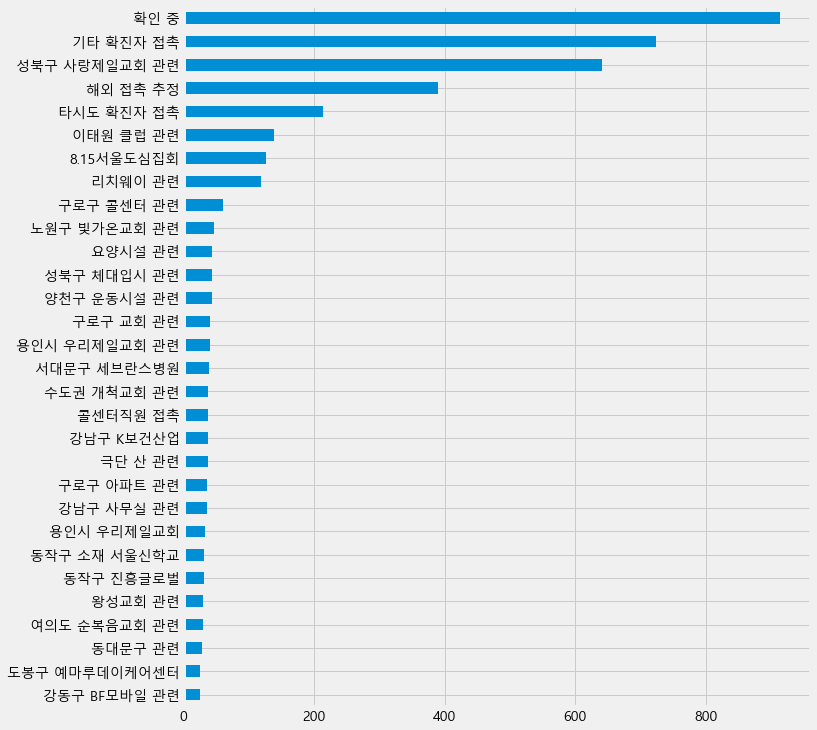

In [114]:
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize = (10,12))

In [115]:
# 상위 20개만 구한다.
top_contact = contact_count_top.tail(20)

In [116]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해본다.
top_contact.index

Index(['극단 산 관련', '강남구 K보건산업', '콜센터직원 접촉', '수도권 개척교회 관련', '서대문구 세브란스병원',
       '용인시 우리제일교회 관련', '구로구 교회 관련', '양천구 운동시설 관련', '성북구 체대입시 관련', '요양시설 관련',
       '노원구 빛가온교회 관련', '구로구 콜센터 관련', '리치웨이 관련', '8.15서울도심집회', '이태원 클럽 관련',
       '타시도 확진자 접촉', '해외 접촉 추정', '성북구 사랑제일교회 관련', '기타 확진자 접촉', '확인 중'],
      dtype='object')

In [117]:
# 위에서 구한 top_contact에 해당되는 데이터만 isin으로 가져온다
top_group = df[df['접촉력'].isin(top_contact.index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28,성북구
7,5235,23695,9.28.,관악구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28,관악구
10,5232,23679,9.28.,도봉구,-,기타 확진자 접촉,NaN,2020-09-28,9,40,09-28,도봉구
12,5230,23659,9.27.,은평구,-,기타 확진자 접촉,NaN,2020-09-27,9,39,09-27,은평구
14,5228,23648,9.27.,강남구,-,기타 확진자 접촉,NaN,2020-09-27,9,39,09-27,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
5203,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25,타지역
5204,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25,관악구
5207,35,870,2.25.,김포,-,확인 중,퇴원,2020-02-25,2,9,02-25,타지역
5210,32,794,2.23.,서초구,-,타시도 확진자 접촉,퇴원,2020-02-23,2,8,02-23,서초구


In [118]:
# 접촉력, 월별 빈도수를 groupby로 구한다.
top_group.groupby(['접촉력','월'])['연번'].count()
# multi index 값으로 출력됨

접촉력            월
8.15서울도심집회     8    113
               9     13
강남구 K보건산업      9     37
구로구 교회 관련      3     35
               4      6
구로구 콜센터 관련     3     60
극단 산 관련        8     36
               9      1
기타 확진자 접촉      8    417
               9    307
노원구 빛가온교회 관련   8     35
               9     11
리치웨이 관련        6    119
서대문구 세브란스병원    9     39
성북구 사랑제일교회 관련  8    628
               9     13
성북구 체대입시 관련    8     39
               9      4
수도권 개척교회 관련    6     37
양천구 운동시설 관련    6     43
요양시설 관련        6     43
용인시 우리제일교회 관련  8     40
               9      1
이태원 클럽 관련      5    133
               6      6
콜센터직원 접촉       3     36
               4      1
타시도 확진자 접촉     2      5
               3     17
               4      4
               5      2
               6      6
               7     16
               8     92
               9     72
해외 접촉 추정       2      1
               3    121
               4    112
               5     24
               6     23
               7     39

In [119]:
top_group.groupby(['접촉력','월'])['연번'].count().unstack()

월,2,3,4,5,6,7,8,9
접촉력,,,,,,,,
8.15서울도심집회,NaN,NaN,NaN,NaN,NaN,NaN,113.0,13.0
강남구 K보건산업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0
구로구 교회 관련,NaN,35.0,6.0,NaN,NaN,NaN,NaN,NaN
구로구 콜센터 관련,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN
극단 산 관련,NaN,NaN,NaN,NaN,NaN,NaN,36.0,1.0
기타 확진자 접촉,NaN,NaN,NaN,NaN,NaN,NaN,417.0,307.0
노원구 빛가온교회 관련,NaN,NaN,NaN,NaN,NaN,NaN,35.0,11.0
리치웨이 관련,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN
서대문구 세브란스병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0


In [120]:
top_group.groupby(['접촉력','월'])['연번'].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9
접촉력,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13
강남구 K보건산업,0,0,0,0,0,0,0,37
구로구 교회 관련,0,35,6,0,0,0,0,0
구로구 콜센터 관련,0,60,0,0,0,0,0,0
극단 산 관련,0,0,0,0,0,0,36,1
기타 확진자 접촉,0,0,0,0,0,0,417,307
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11
리치웨이 관련,0,0,0,0,119,0,0,0
서대문구 세브란스병원,0,0,0,0,0,0,0,39


**이태원 클럽, 사랑제일교회 관련**
- 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있다.
- 6월에 이태원 클럽관련 확진자를 찾아본다.
- 마찬가지로 사랑제일교회도 9월 확진자를 찾아본다.

In [121]:
df[df['접촉력'].str.contains('이태원') & (df['월'] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4262,980,11785,6.06.,성동구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,성동구
4277,965,11742,6.06.,은평구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,은평구
4286,956,11751,6.06.,성동구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,성동구
4293,949,11709,6.05.,은평구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,은평구
4308,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
4366,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


In [122]:
df[df['접촉력'].str.contains('사랑제일교회') & (df['월'] == 9)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
994,4248,20962,9.04.,성북구,-,성북구 사랑제일교회 관련,퇴원,2020-09-04,9,36,09-04,성북구
1048,4194,20833,9.03.,은평구,-,성북구 사랑제일교회 관련,NaN,2020-09-03,9,36,09-03,은평구
1055,4187,20885,9.03.,도봉구,-,성북구 사랑제일교회 관련,퇴원,2020-09-03,9,36,09-03,도봉구
1069,4173,20723,9.02.,강동구,-,성북구 사랑제일교회 관련,퇴원,2020-09-02,9,36,09-02,강동구
1080,4162,20724,9.02.,은평구,-,성북구 사랑제일교회 관련,NaN,2020-09-02,9,36,09-02,은평구
1115,4127,20596,9.02.,노원구,-,성북구 사랑제일교회 관련,퇴원,2020-09-02,9,36,09-02,노원구
1134,4108,20562,9.01.,은평구,-,성북구 사랑제일교회 관련,퇴원,2020-09-01,9,36,09-01,은평구
1142,4100,20577,9.02.,중구,-,성북구 사랑제일교회 관련,퇴원,2020-09-02,9,36,09-02,중구
1143,4099,20582,9.02.,중구,-,성북구 사랑제일교회 관련,퇴원,2020-09-02,9,36,09-02,중구
1186,4056,20421,9.01.,강동구,-,성북구 사랑제일교회 관련,퇴원,2020-09-01,9,36,09-01,강동구


**감입경로 불명**

In [123]:
df['접촉력']

0        도봉구 다나병원
1        도봉구 다나병원
2        확진자 조사 중
3        확진자 조사 중
4       기타 확진자 접촉
          ...    
5237        #5 접촉
5238        해외 접촉
5239        #3 접촉
5240        해외 접촉
5241        해외 접촉
Name: 접촉력, Length: 5242, dtype: object

In [124]:
# '접촉력'이 '확인 중'인 데이터만 구한다.
df_unknown = df[df['접촉력'] == '확인 중']
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
32,5210,23607,9.26.,관악구,-,확인 중,NaN,2020-09-26,9,39,09-26,관악구
34,5208,23589,9.26.,강동구,-,확인 중,NaN,2020-09-26,9,39,09-26,강동구
50,5192,23574,9.26.,송파구,-,확인 중,NaN,2020-09-26,9,39,09-26,송파구
52,5190,23553,9.26.,타시도,-,확인 중,NaN,2020-09-26,9,39,09-26,타지역
57,5185,23562,9.26.,도봉구,-,확인 중,NaN,2020-09-26,9,39,09-26,도봉구


In [125]:
df_unknown.shape

(914, 12)

In [126]:
df_unknown.groupby(['월','주'])['연번'].count()

월  주 
2  9      11
3  10      4
   11     11
   12      9
   13      3
   14      1
4  14      3
   15      5
   16      1
5  20      1
   21      1
   22     10
6  23     18
   24     25
   25     16
   26     11
   27      5
7  27      8
   28     11
   29      9
   30     13
   31      8
8  31      1
   32     15
   33     25
   34    171
   35    229
   36     18
9  36     76
   37     78
   38     76
   39     41
Name: 연번, dtype: int64

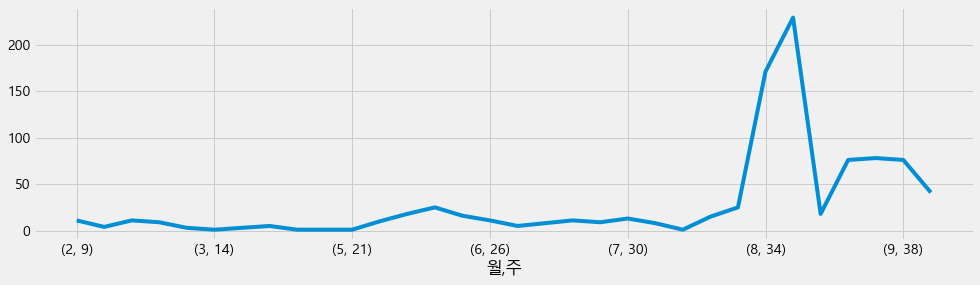

In [128]:
# 감입경로 불명이 어느정도인지 본다.
unknown_weekly_case = df_unknown.groupby(['월','주'])['연번'].count()
unknown_weekly_case.plot(figsize = (15,4))
plt.show()

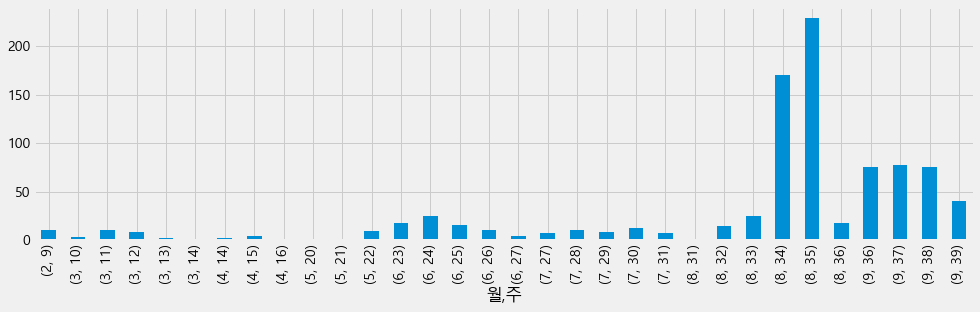

In [129]:
unknown_weekly_case.plot.bar(figsize = (15,4))
plt.show()

In [130]:
df['주'].value_counts()

35    924
34    913
36    458
33    390
37    341
38    281
39    236
23    134
14    128
24    125
11    124
25    106
13    105
30     97
22     87
26     78
12     76
32     76
27     67
9      62
28     57
19     51
20     48
29     48
15     47
21     39
31     38
10     37
8      17
16     15
40     11
18      8
5       7
17      4
6       4
7       2
4       1
Name: 주, dtype: int64

In [131]:
# 전체 확진수를 value_counts로 구하고 데이터프레임 형태로 만든다.
all_weekly_case = df['주'].value_counts().to_frame()
all_weekly_case.columns = ['전체확진수']
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [132]:
# 접촉원인을 모르는 데이터 확인
df_unknown['주'].value_counts()

35    229
34    171
36     94
37     78
38     76
39     41
33     25
24     25
23     18
25     16
32     15
27     13
30     13
9      11
28     11
26     11
11     11
22     10
12      9
29      9
31      9
15      5
14      4
10      4
13      3
16      1
21      1
20      1
Name: 주, dtype: int64

In [133]:
unknown_weekly_case = df_unknown['주'].value_counts().to_frame()
unknown_weekly_case.columns = ['불명확진수']
unknown_weekly_case.head()

,불명확진수
35,229
34,171
36,94
37,78
38,76


In [134]:
# all_weekly_case와 unknown_weekly_case를 비교. index 기준 merge 하기
all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)

,전체확진수,불명확진수
35,924,229
34,913,171
36,458,94
33,390,25
37,341,78
38,281,76
39,236,41
23,134,18
14,128,4
24,125,25


In [135]:
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)
unknown_case= unknown_case.sort_index() # '주'별로 정렬하기 위함
unknown_case.head()

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3


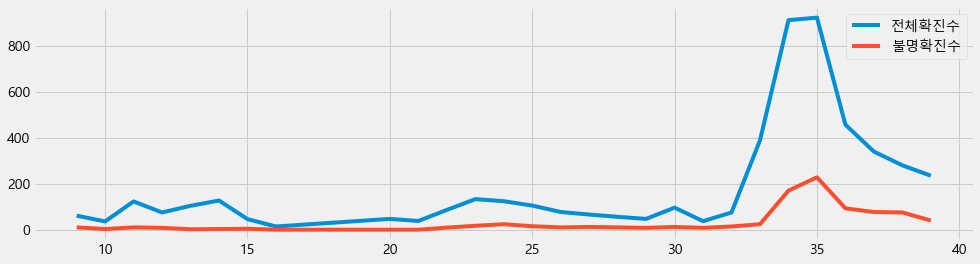

In [136]:
unknown_case.plot(figsize = (15,4))
plt.show()

In [137]:
# 감염경로 '확인 중'의 주별 비율
unknown_case['불명확진수'] / unknown_case['전체확진수']

9     0.177419
10    0.108108
11    0.088710
12    0.118421
13    0.028571
14    0.031250
15    0.106383
16    0.066667
20    0.020833
21    0.025641
22    0.114943
23    0.134328
24    0.200000
25    0.150943
26    0.141026
27    0.194030
28    0.192982
29    0.187500
30    0.134021
31    0.236842
32    0.197368
33    0.064103
34    0.187295
35    0.247835
36    0.205240
37    0.228739
38    0.270463
39    0.173729
dtype: float64

<AxesSubplot:>

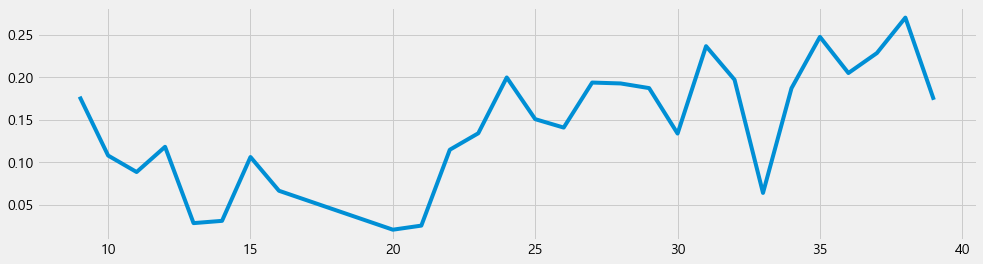

In [138]:
unknown_case['확인중비율'] = unknown_case['불명확진수'] / unknown_case['전체확진수']
unknown_case['확인중비율'].plot(figsize = (15,4))

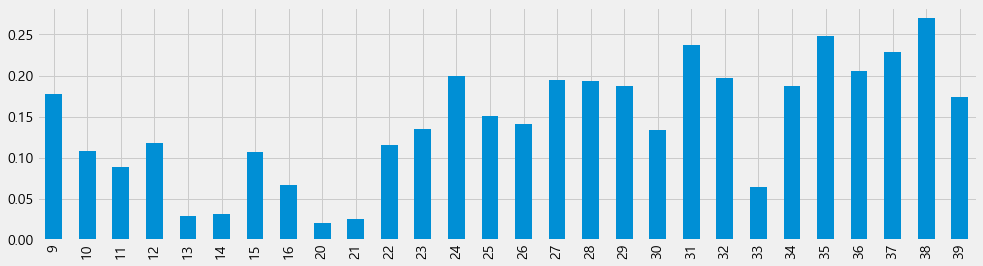

In [139]:
unknown_case['확인중비율'].plot.bar(figsize = (15,4))
plt.show()

## 11. 퇴원현황

In [ ]:
# [참고]
# df['퇴원']  = df['조치사항'].str.contain('퇴원') : '퇴원'이라는 글을 포함한 문자 추출
# df['조치사항'].str.replace('\(퇴원\)','') : '(퇴원)' 문자를 공백('') 으로 변경

In [140]:
df['퇴원현황'].value_counts()

퇴원    4399
사망      55
Name: 퇴원현황, dtype: int64

In [142]:
# 퇴원/사망 비율 구하기
df['퇴원현황'].value_counts(normalize = True)

퇴원    0.987652
사망    0.012348
Name: 퇴원현황, dtype: float64

In [143]:
# '퇴원'이라는 글을 포함한 문자 추출
df['퇴원'] = df['퇴원현황'].str.contains('퇴원')
df['퇴원']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
5237    True
5238    True
5239    True
5240    True
5241    True
Name: 퇴원, Length: 5242, dtype: object

In [144]:
df['퇴원'].value_counts() # 55명이 퇴원하지 못한 환자수

True     4399
False      55
Name: 퇴원, dtype: int64

In [145]:
df['퇴원'].value_counts(normalize=True)

True     0.987652
False    0.012348
Name: 퇴원, dtype: float64

In [146]:
df['퇴원'].value_counts(normalize=True) * 100

True     98.765155
False     1.234845
Name: 퇴원, dtype: float64

In [148]:
# '사망'이라는 글을 포함한 문자 추출
df['사망'] = df['퇴원현황'].str.contains('사망')
df['사망']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
5237    False
5238    False
5239    False
5240    False
5241    False
Name: 사망, Length: 5242, dtype: object

In [149]:
df['사망'].value_counts()

False    4399
True       55
Name: 사망, dtype: int64

In [150]:
df['사망'].value_counts(normalize=True) * 100

False    98.765155
True      1.234845
Name: 사망, dtype: float64

In [151]:
# 퇴원 못한 환자 리스트 추출
df[(df['퇴원'] == False)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,퇴원,사망
783,4459,21525,9.08.,성북구,-,확인 중,사망,2020-09-08,9,37,09-08,성북구,False,True
991,4251,21075,9.04.,기타,-,송파구 소재병원,사망,2020-09-04,9,36,09-04,타지역,False,True
1034,4208,20939,9.04.,은평구,-,확인 중,사망,2020-09-04,9,36,09-04,은평구,False,True
1071,4171,20753,9.02.,성북구,-,성북구 요양시설,사망,2020-09-02,9,36,09-02,성북구,False,True
1156,4086,20532,9.01.,서대문구,-,서대문구 지인모임,사망,2020-09-01,9,36,09-01,서대문구,False,True
1303,3939,20073,8.30.,노원구,-,확인 중,사망,2020-08-30,8,35,08-30,노원구,False,True
1309,3933,20157,8.31.,성북구,-,성북구 요양시설,사망,2020-08-31,8,36,08-31,성북구,False,True
1340,3902,19974,8.30.,성동구,-,확인 중,사망,2020-08-30,8,35,08-30,성동구,False,True
1389,3853,19875,8.30.,기타,-,확인 중,사망,2020-08-30,8,35,08-30,타지역,False,True
1400,3842,19759,8.29.,강서구,-,확인 중,사망,2020-08-29,8,35,08-29,강서구,False,True
